In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nSeaborn {sns.__version__}" ) 
# Load the pokemon dataset
df = pd.read_csv('movie_metadata.csv')  
df.shape

Python 3.9.12 (main, Jun  1 2022, 06:34:44) 
[Clang 12.0.0 ]
Pandas 1.5.2
NumPy 1.22.4
Seaborn 0.12.2


(5043, 28)

In [2]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values_before=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values_before[Perc_Of_Missing_Values_before!=0]

Percentage Of Missing Values


color                       0.376760
director_name               2.062265
num_critic_for_reviews      0.991473
duration                    0.297442
director_facebook_likes     2.062265
actor_3_facebook_likes      0.456078
actor_2_name                0.257783
actor_1_facebook_likes      0.138806
gross                      17.529248
actor_1_name                0.138806
actor_3_name                0.456078
facenumber_in_poster        0.257783
plot_keywords               3.033908
num_user_for_reviews        0.416419
language                    0.237954
country                     0.099147
content_rating              6.008328
budget                      9.756098
title_year                  2.141582
actor_2_facebook_likes      0.257783
aspect_ratio                6.523895
dtype: float64

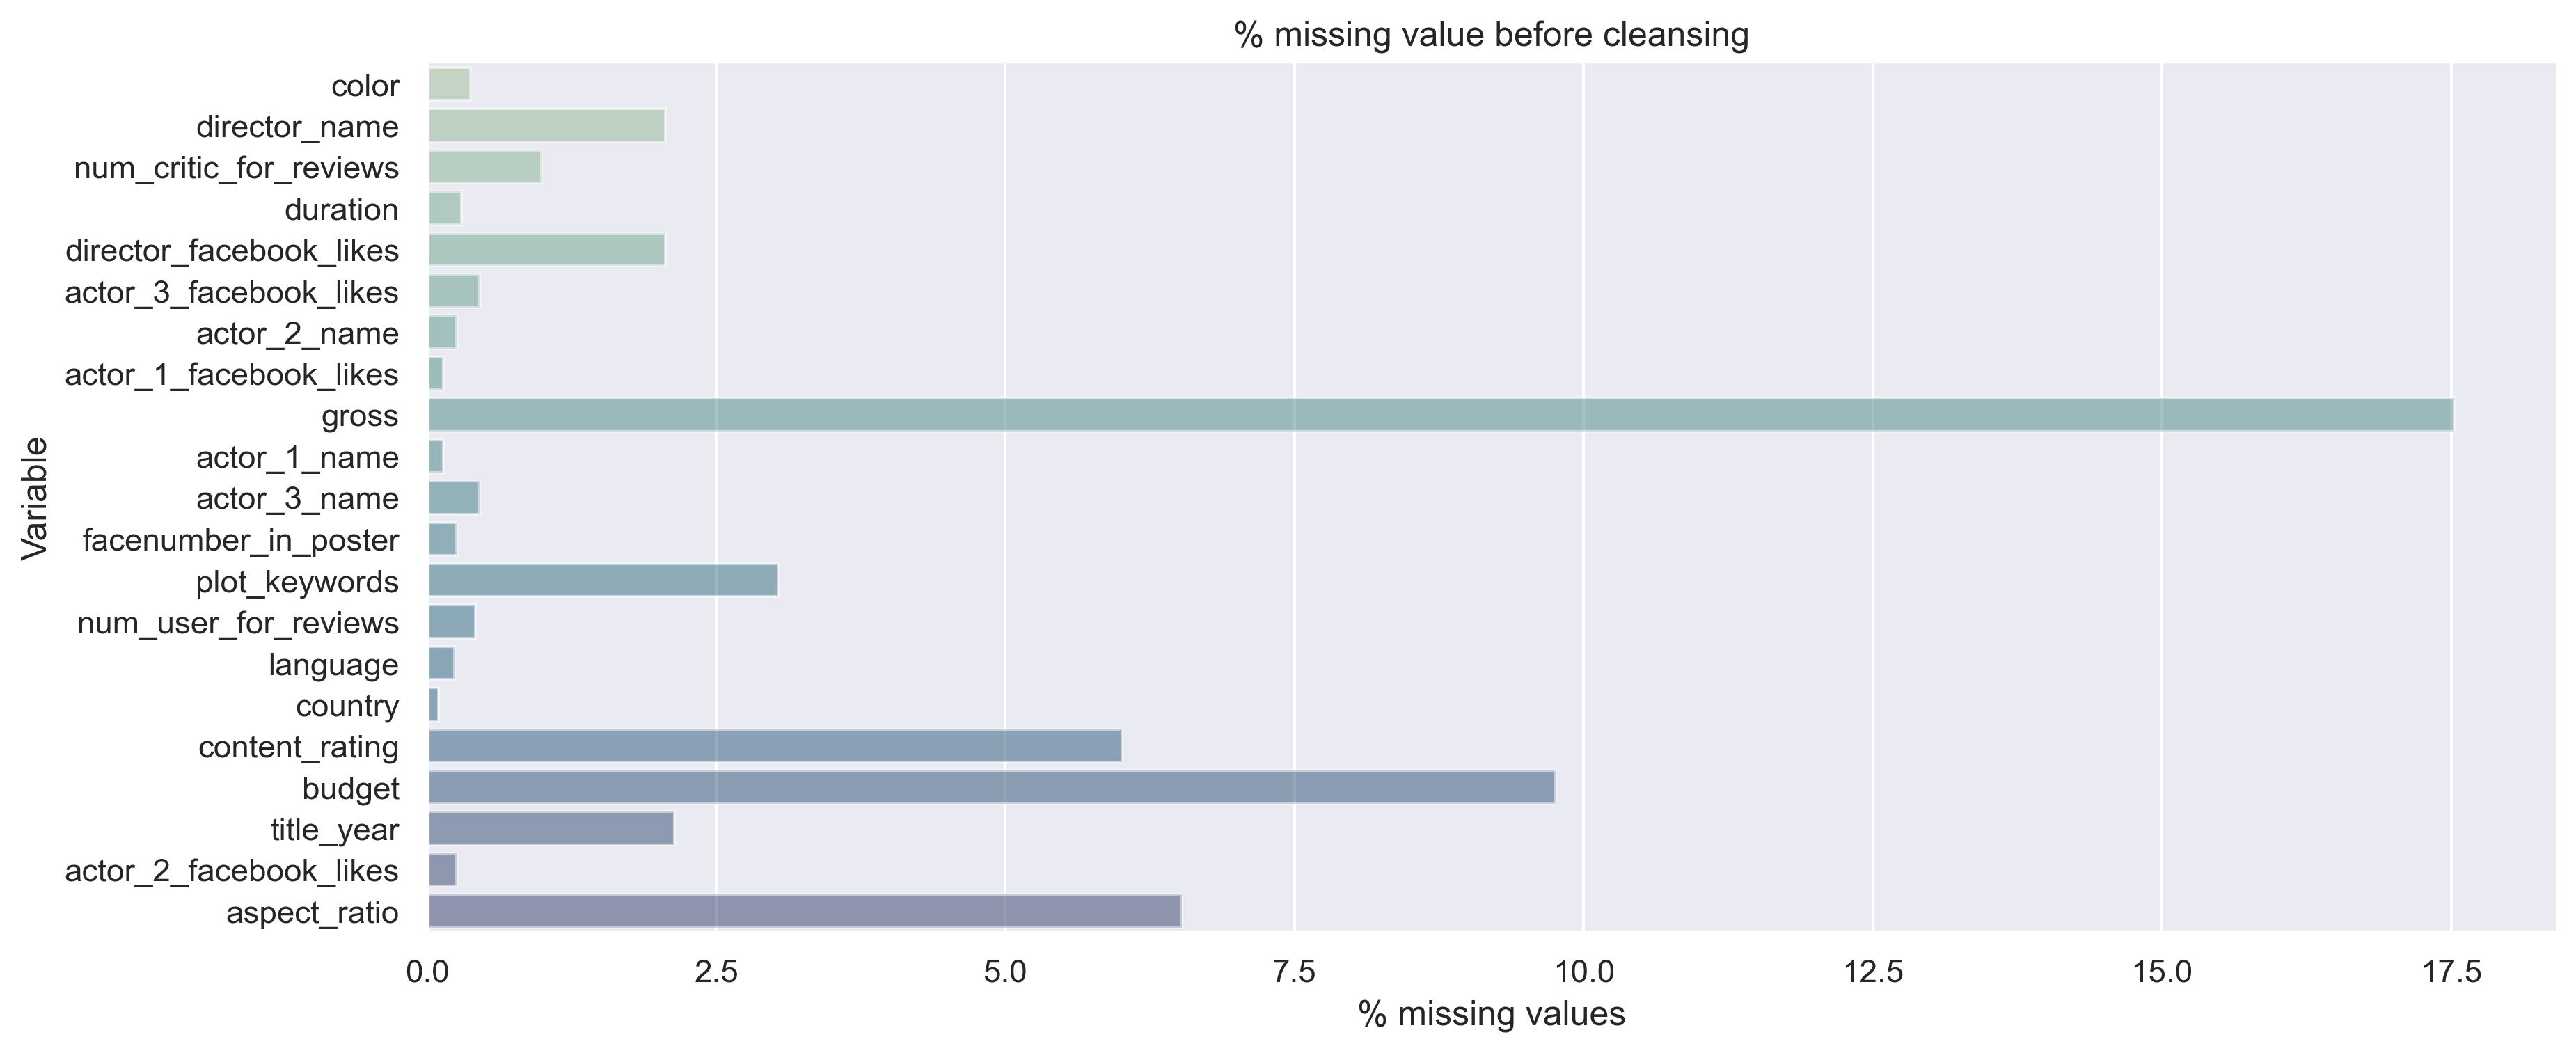

In [3]:
only_missing_before=Perc_Of_Missing_Values_before[Perc_Of_Missing_Values_before!=0]
df_only_missing_before = only_missing_before.reset_index()
df_only_missing_before.columns = ['variable', '% Missing']
sns.set(rc={'figure.dpi':300})
sns.catplot(y='variable', 
            x='% Missing', 
            kind='bar',
            palette="crest", 
            data=df_only_missing_before, 
            height=5, aspect=2.5, 
            alpha=0.5
            )
plt.title("% missing value before cleansing")
plt.xlabel("% missing values")
plt.ylabel("Variable")
plt.show()
# only_missing_before.plot(kind="bar")
# plt.title("% missing value before cleansing")
# plt.show()

In [4]:
#drop na variable gross & budget
df.dropna(subset=['gross', 'budget'], inplace=True)
df.reset_index(drop=True, inplace=True)
Perc_Of_Missing_Values_after=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values_after[Perc_Of_Missing_Values_after!=0]

color                     0.051401
num_critic_for_reviews    0.025700
duration                  0.025700
actor_3_facebook_likes    0.257003
actor_2_name              0.128502
actor_1_facebook_likes    0.077101
actor_1_name              0.077101
actor_3_name              0.257003
facenumber_in_poster      0.154202
plot_keywords             0.796710
language                  0.077101
content_rating            1.310717
actor_2_facebook_likes    0.128502
aspect_ratio              1.927525
dtype: float64

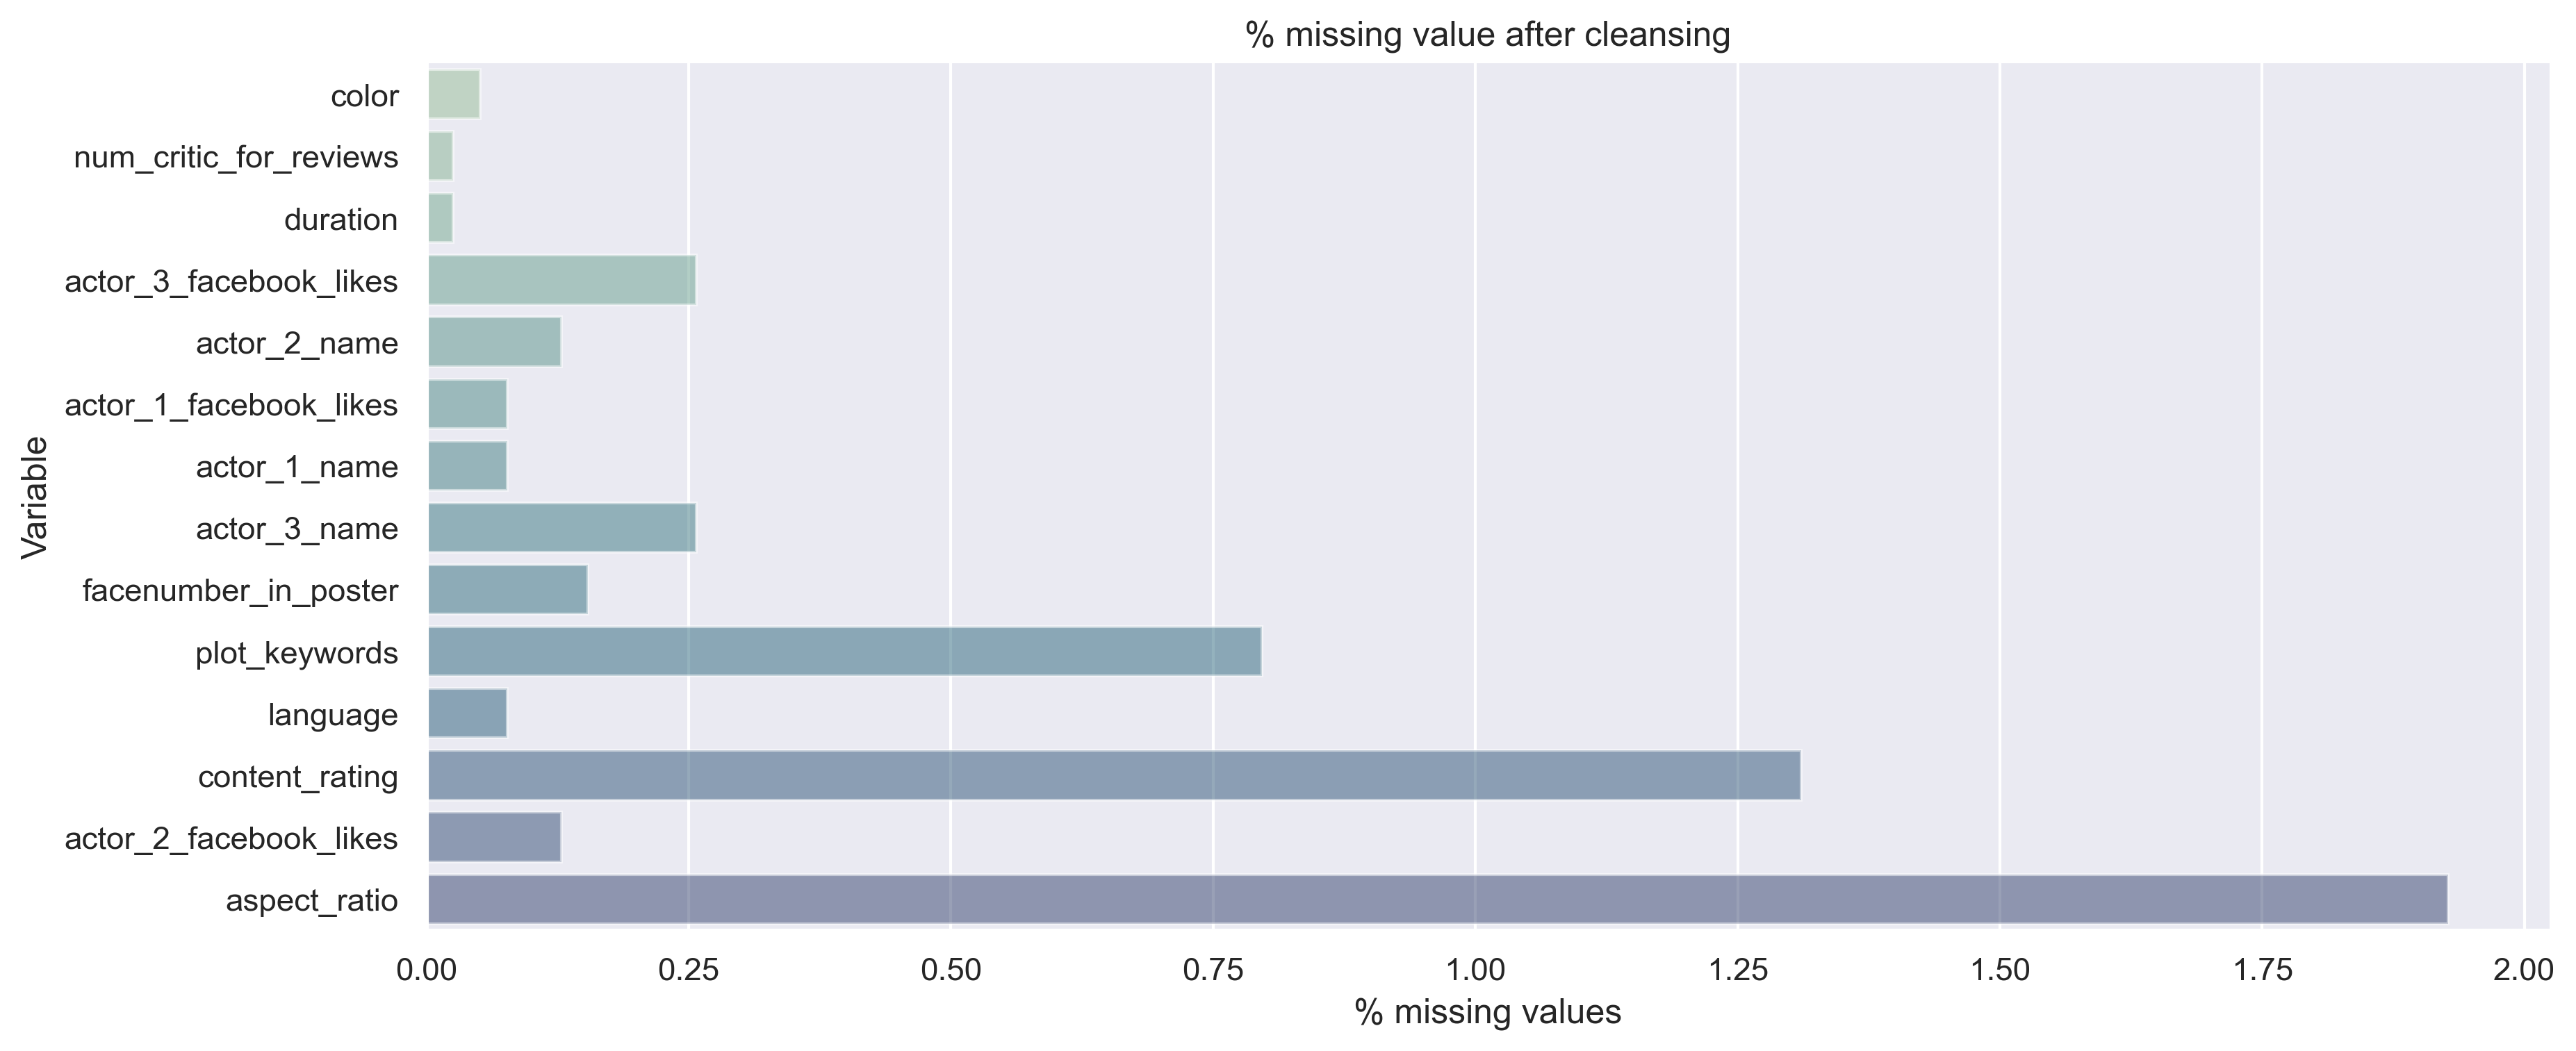

(3891, 28)

In [5]:
only_missing_after=Perc_Of_Missing_Values_after[Perc_Of_Missing_Values_after!=0]
df_only_missing_after = only_missing_after.reset_index()
df_only_missing_after.columns = ['variable', '% Missing']
sns.set(rc={'figure.dpi':300})
sns.catplot(y='variable', 
            x='% Missing', 
            kind='bar', 
            palette="crest",
            data=df_only_missing_after, 
            height=5, aspect=2.5, 
            alpha=0.5
            )
plt.title("% missing value after cleansing")
plt.xlabel("% missing values")
plt.ylabel("Variable")
plt.show()
df.shape
# only_missing_after.plot(kind="bar")
# plt.title("% missing value after cleansing")
# plt.show()

In [6]:
#Cleansing country data
# Check Data in Country because we have to use this column
df['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'India', 'Aruba',
       'Denmark', 'Belgium', 'Ireland', 'South Africa', 'Italy',
       'Romania', 'Chile', 'Netherlands', 'Hungary', 'Russia', 'Mexico',
       'Greece', 'Taiwan', 'Official site', 'Thailand', 'Iran',
       'West Germany', 'Georgia', 'Iceland', 'Brazil', 'Finland',
       'Norway', 'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan', 'Sweden', 'Philippines'], dtype=object)

In [7]:
df['country'] = df['country'].replace(['Official site', 'New Line'], 'USA').replace(['West Germany'],'Germany')

/var/folders/kg/w853qbnj03x0b8wb35_f_v540000gp/T/ipykernel_55494/2417221888.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], kde=False, color='red',


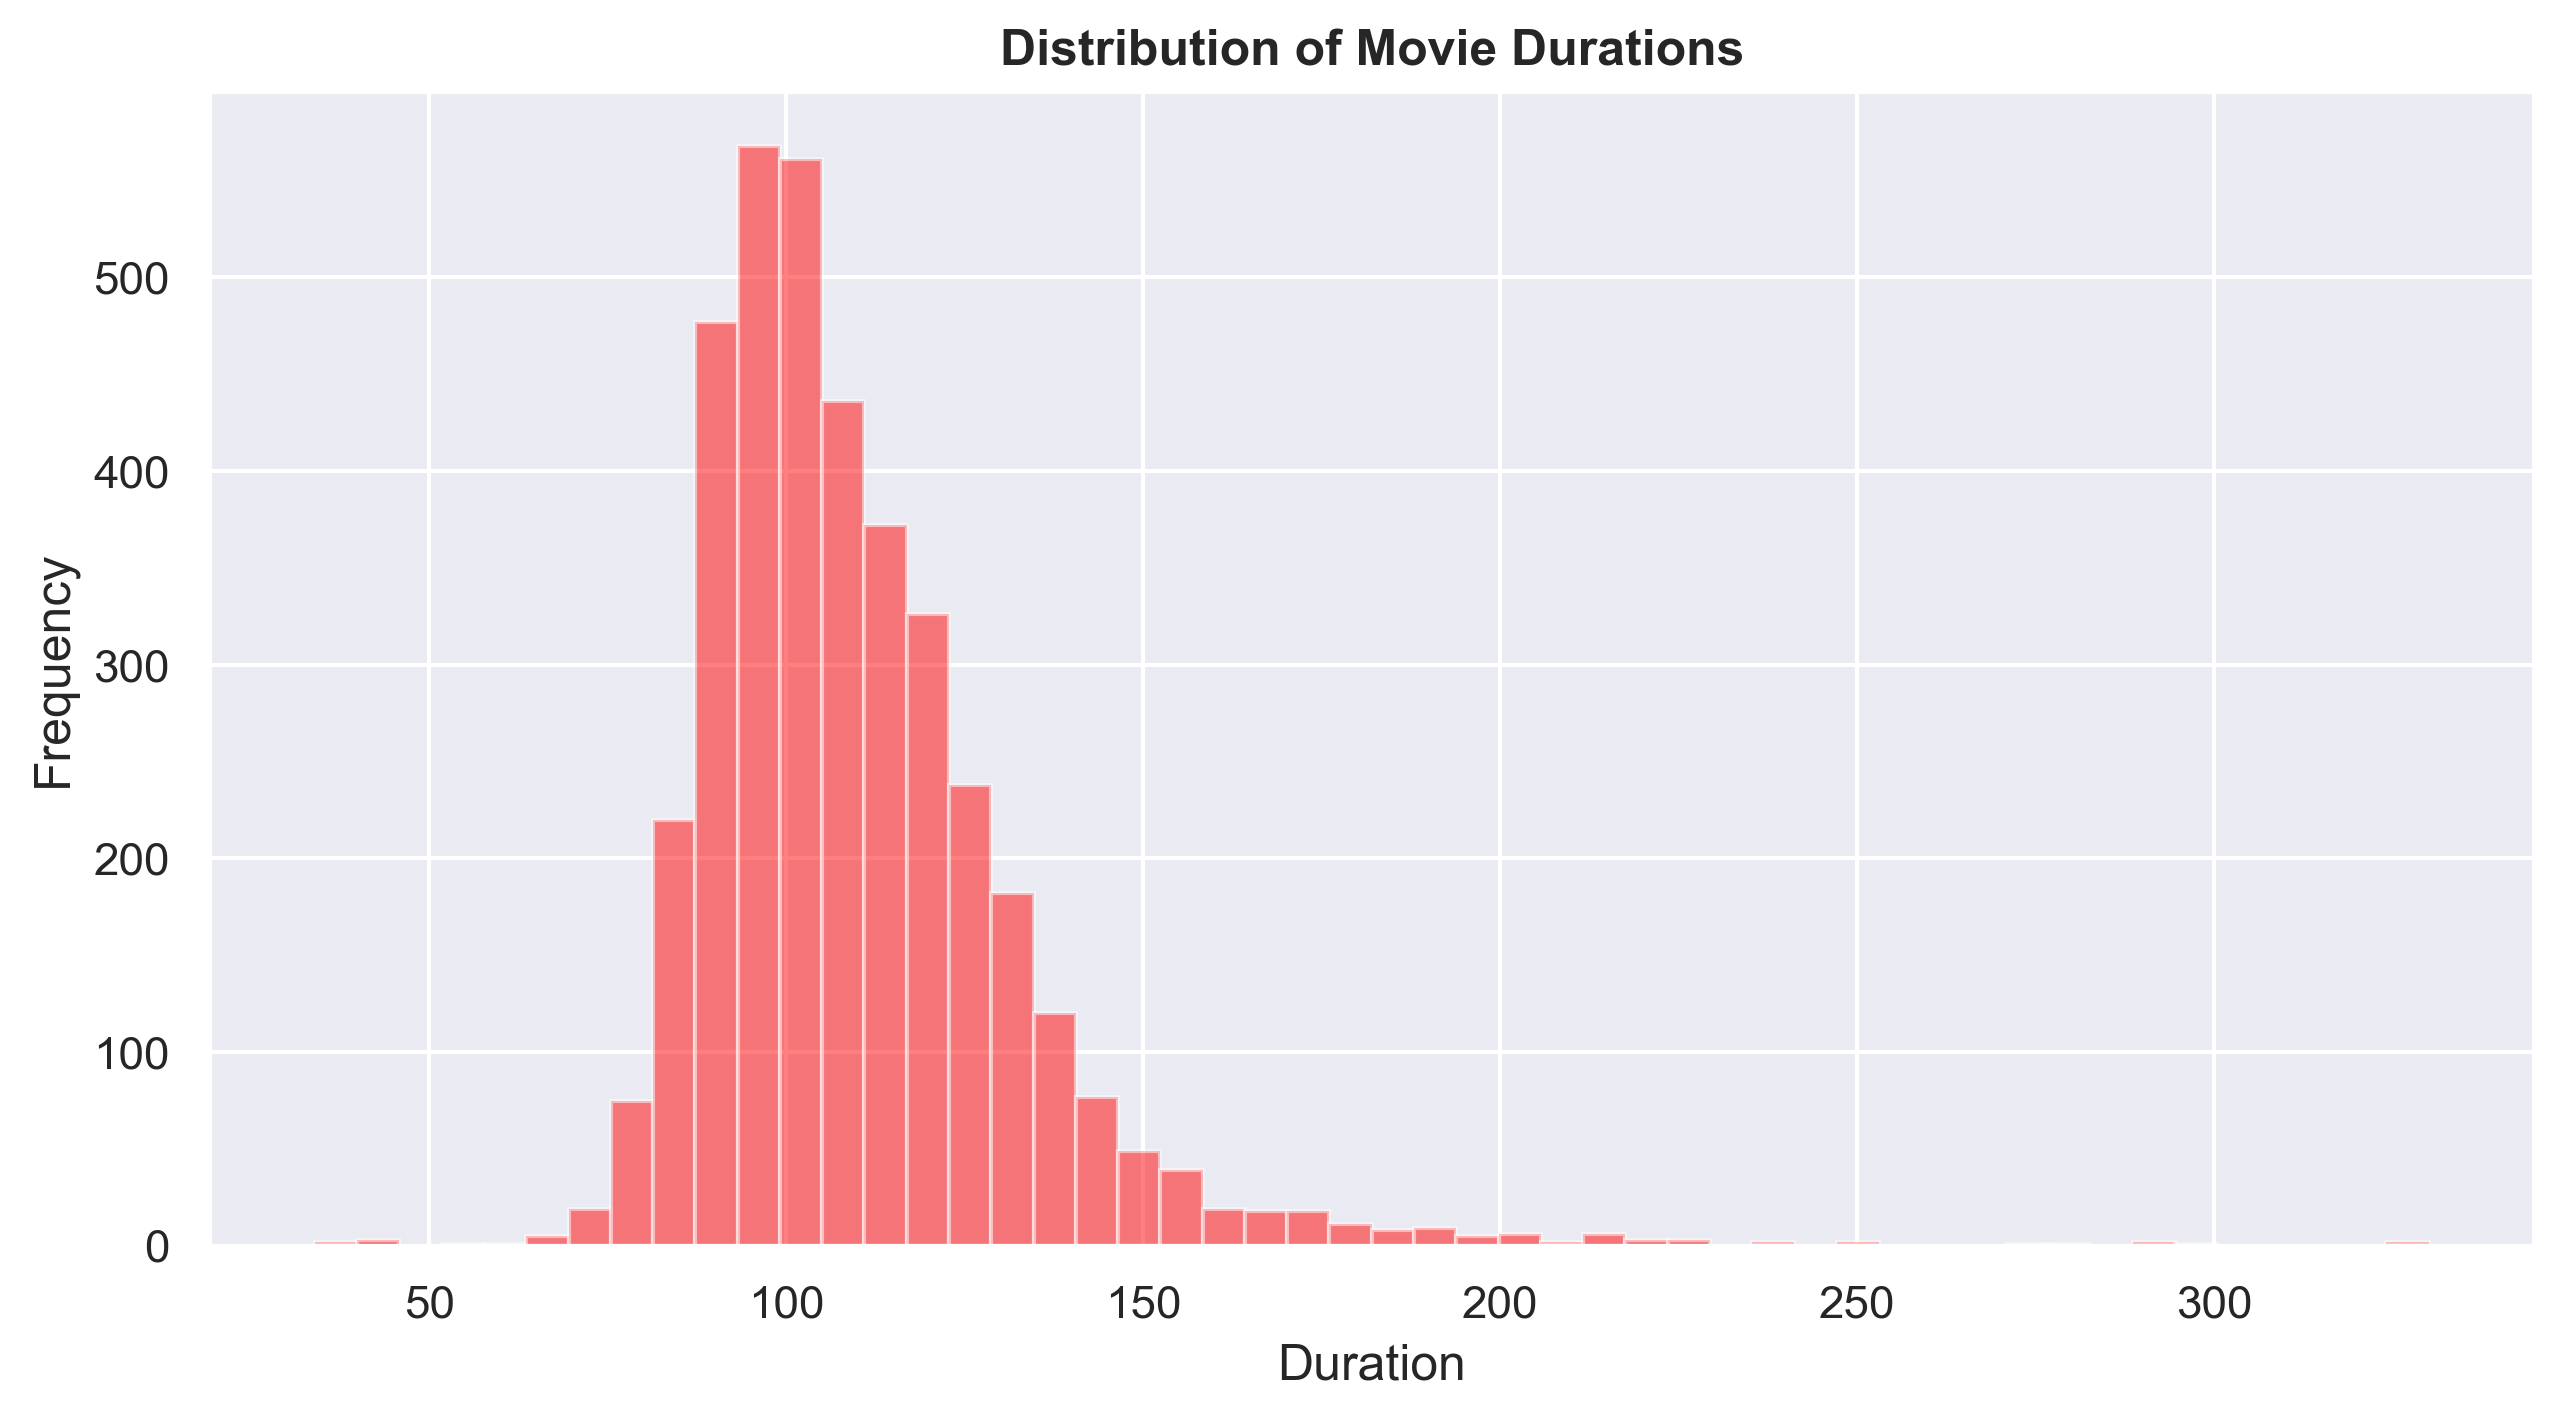

In [8]:
#1. ปัจจัยที่ส่งผลต่อ ค่าrating IMDB (runtime, actor, director, etc. )plt.figure(figsize=(10,5))
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.size'] = 10

# # set font scale using sns
# sns.set(font_scale=0.6)

# # create a distplot
# sns.distplot(df['duration'], kde=False, color='red', 
#             hist_kws={'alpha': 0.5},
#             axlabel='Duration', 
#             ax=ax)

# # add labels and title
# plt.xlabel('Duration')
# plt.ylabel('Frequency')
# plt.title('Distribution of Movie Durations', fontweight='bold')

# # show the plot
# plt.show()
# fig, ax = plt.subplots(figsize=(10, 5))
plt.figure(figsize=(10,5), dpi=300)
ax = plt.gca()
sns.distplot(df['duration'], kde=False, color='red', 
            hist_kws={'alpha': 0.5},
            axlabel='Duration', 
            ax=ax)
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Durations', fontweight='bold')
plt.show()


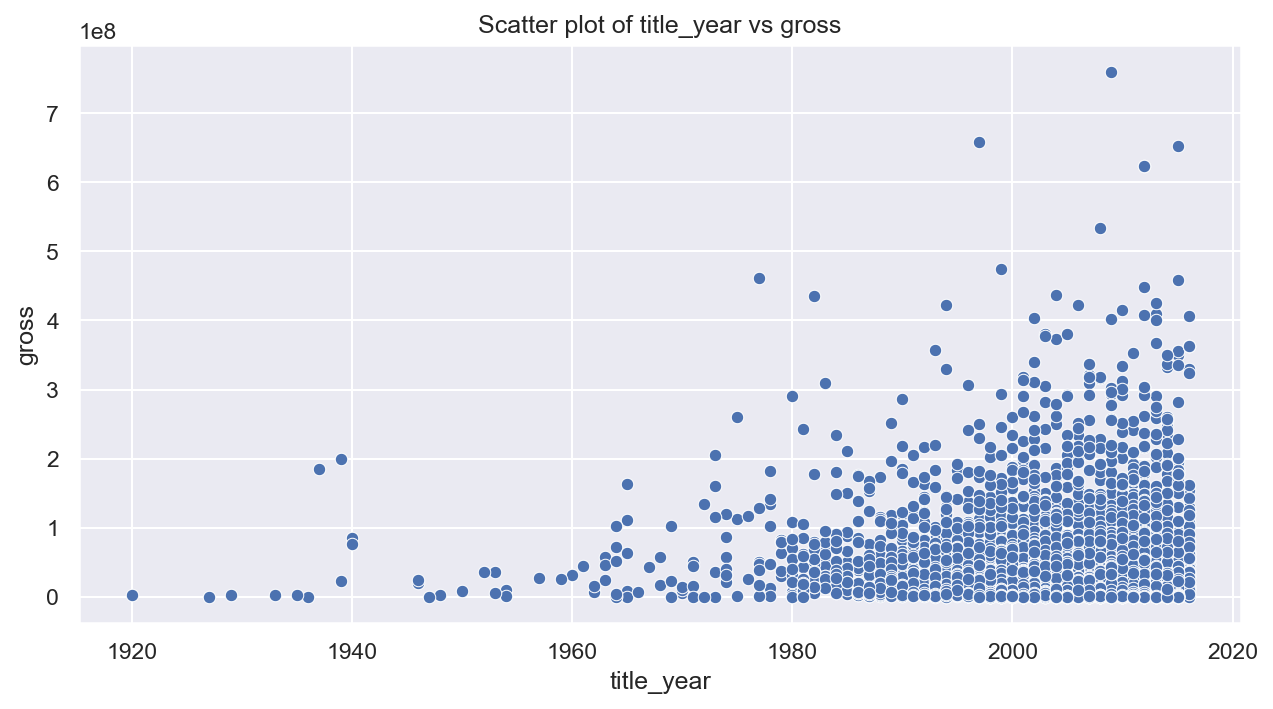

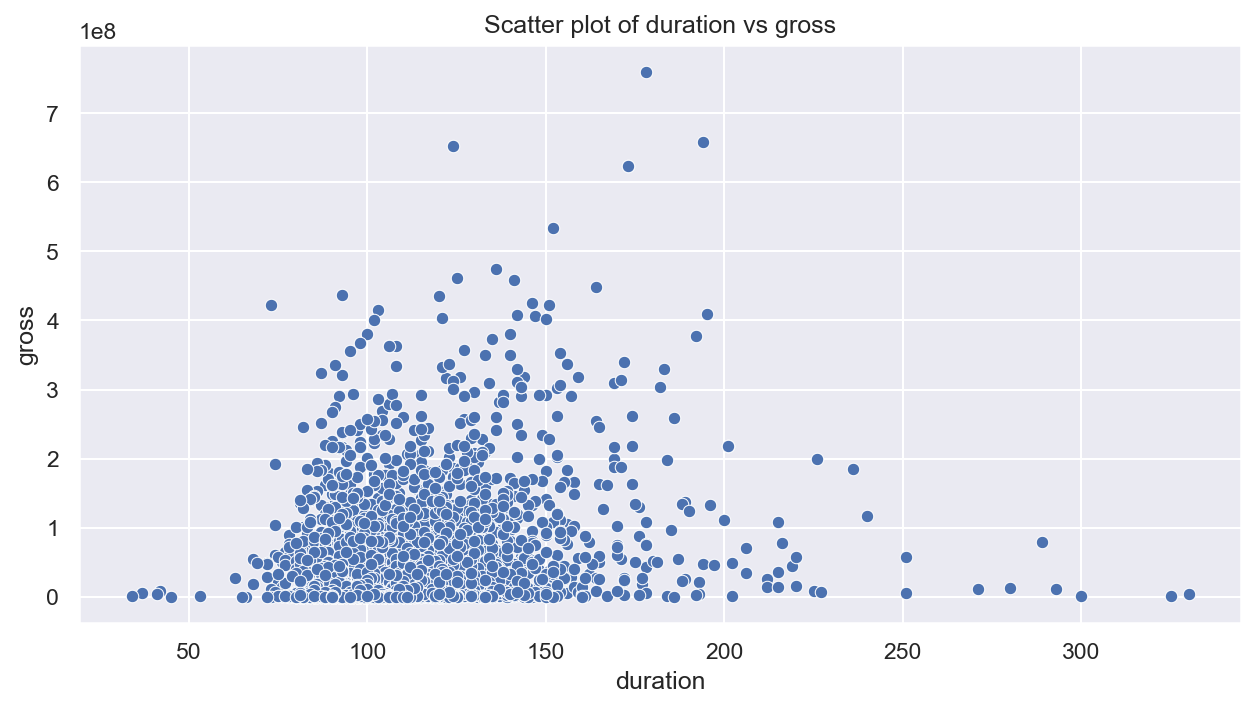

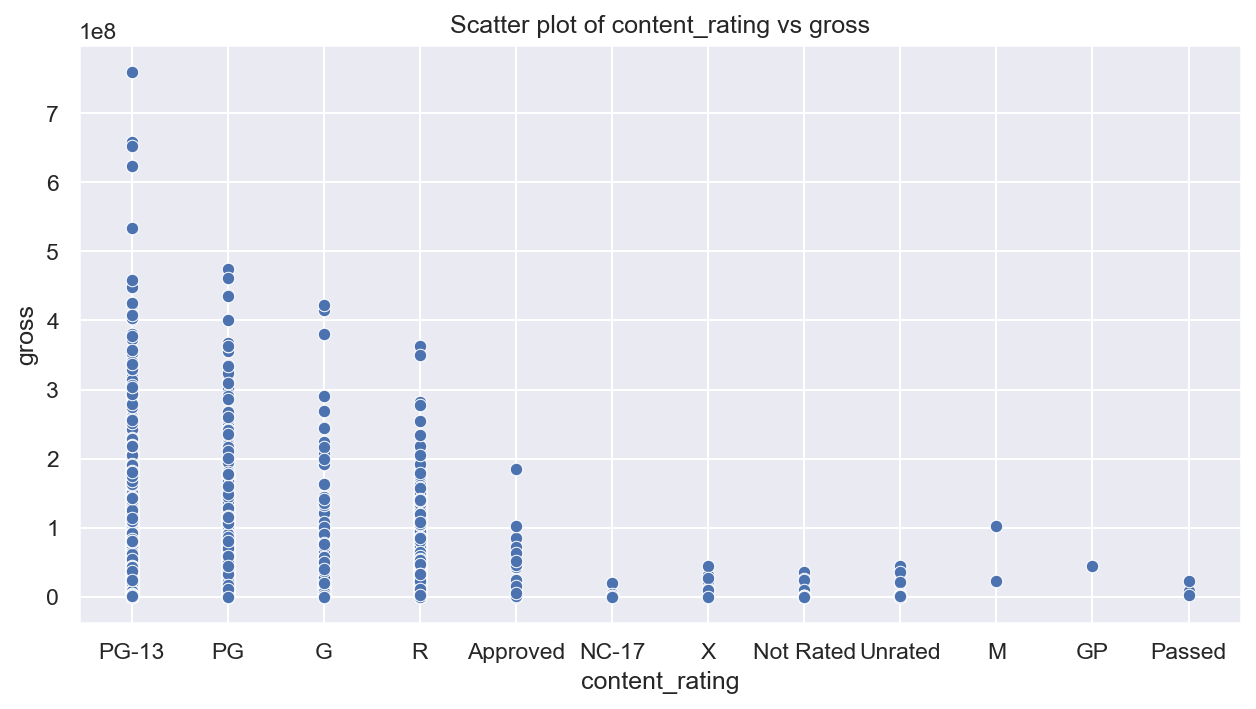

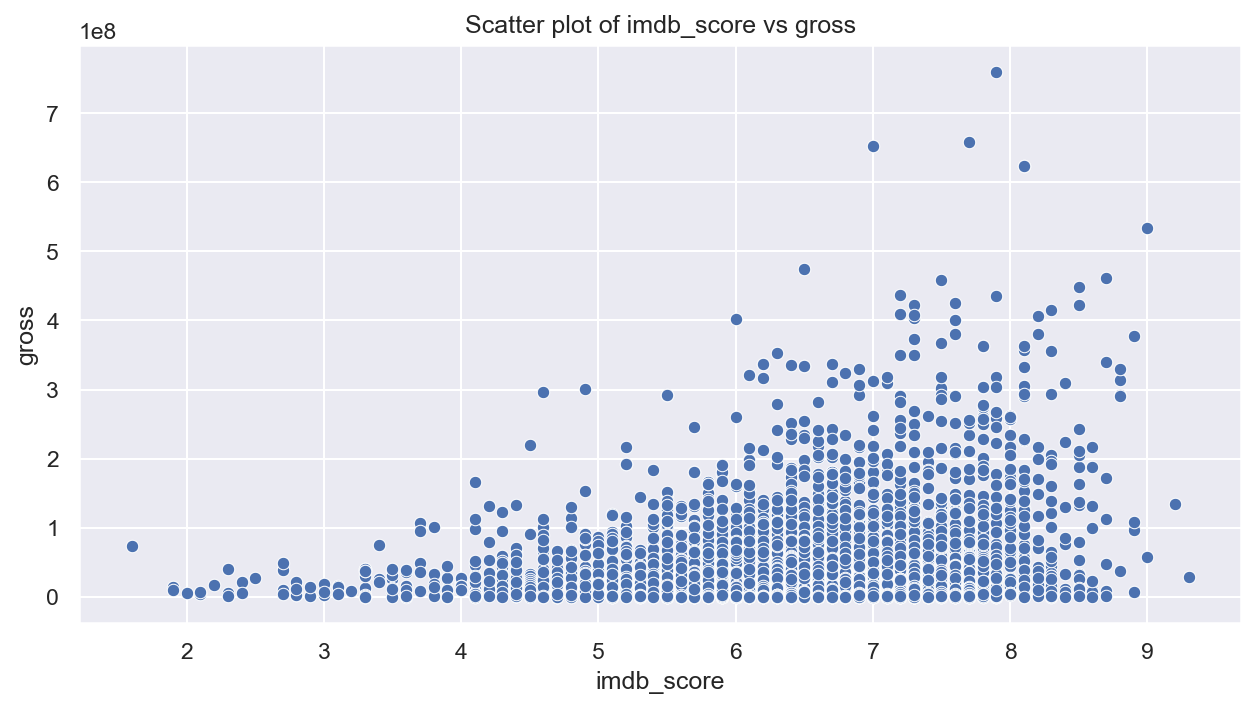

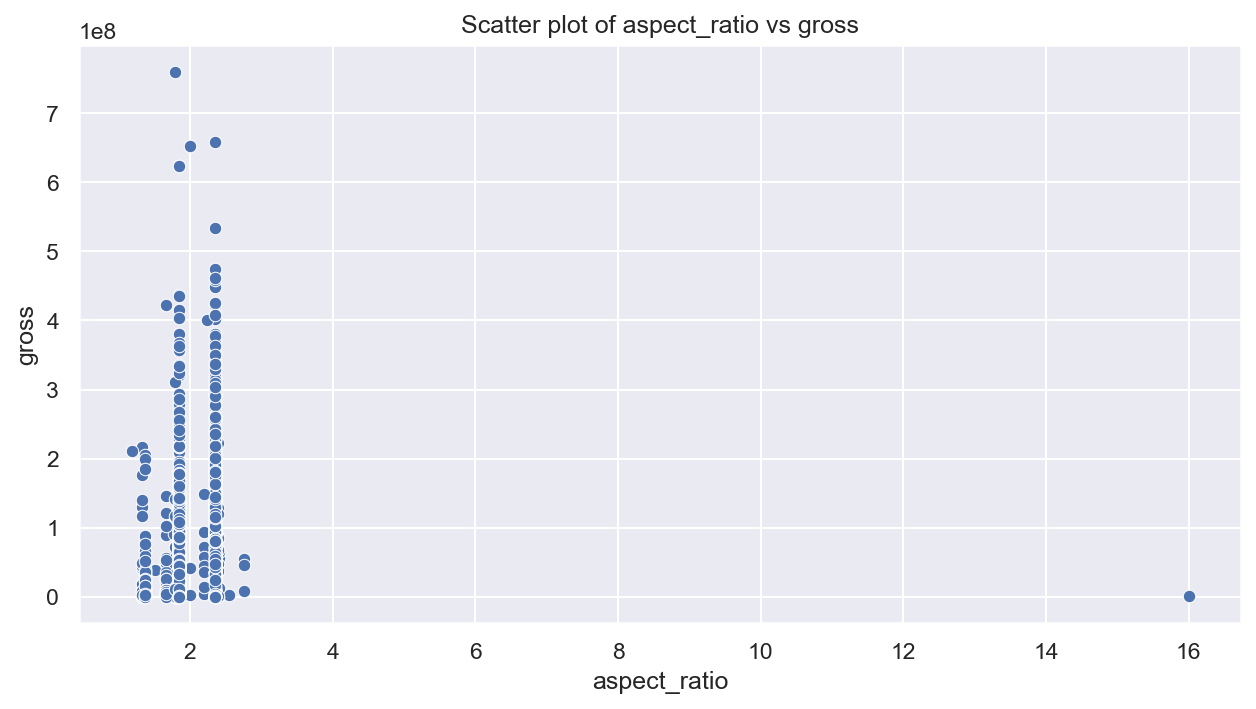

In [27]:
datawithgross = ["title_year", "duration", "content_rating", "imdb_score", "aspect_ratio"]

for a in datawithgross:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=a, y="gross", data=df, alpha=1)
    plt.title("Scatter plot of {} vs gross".format(a))
    plt.show()

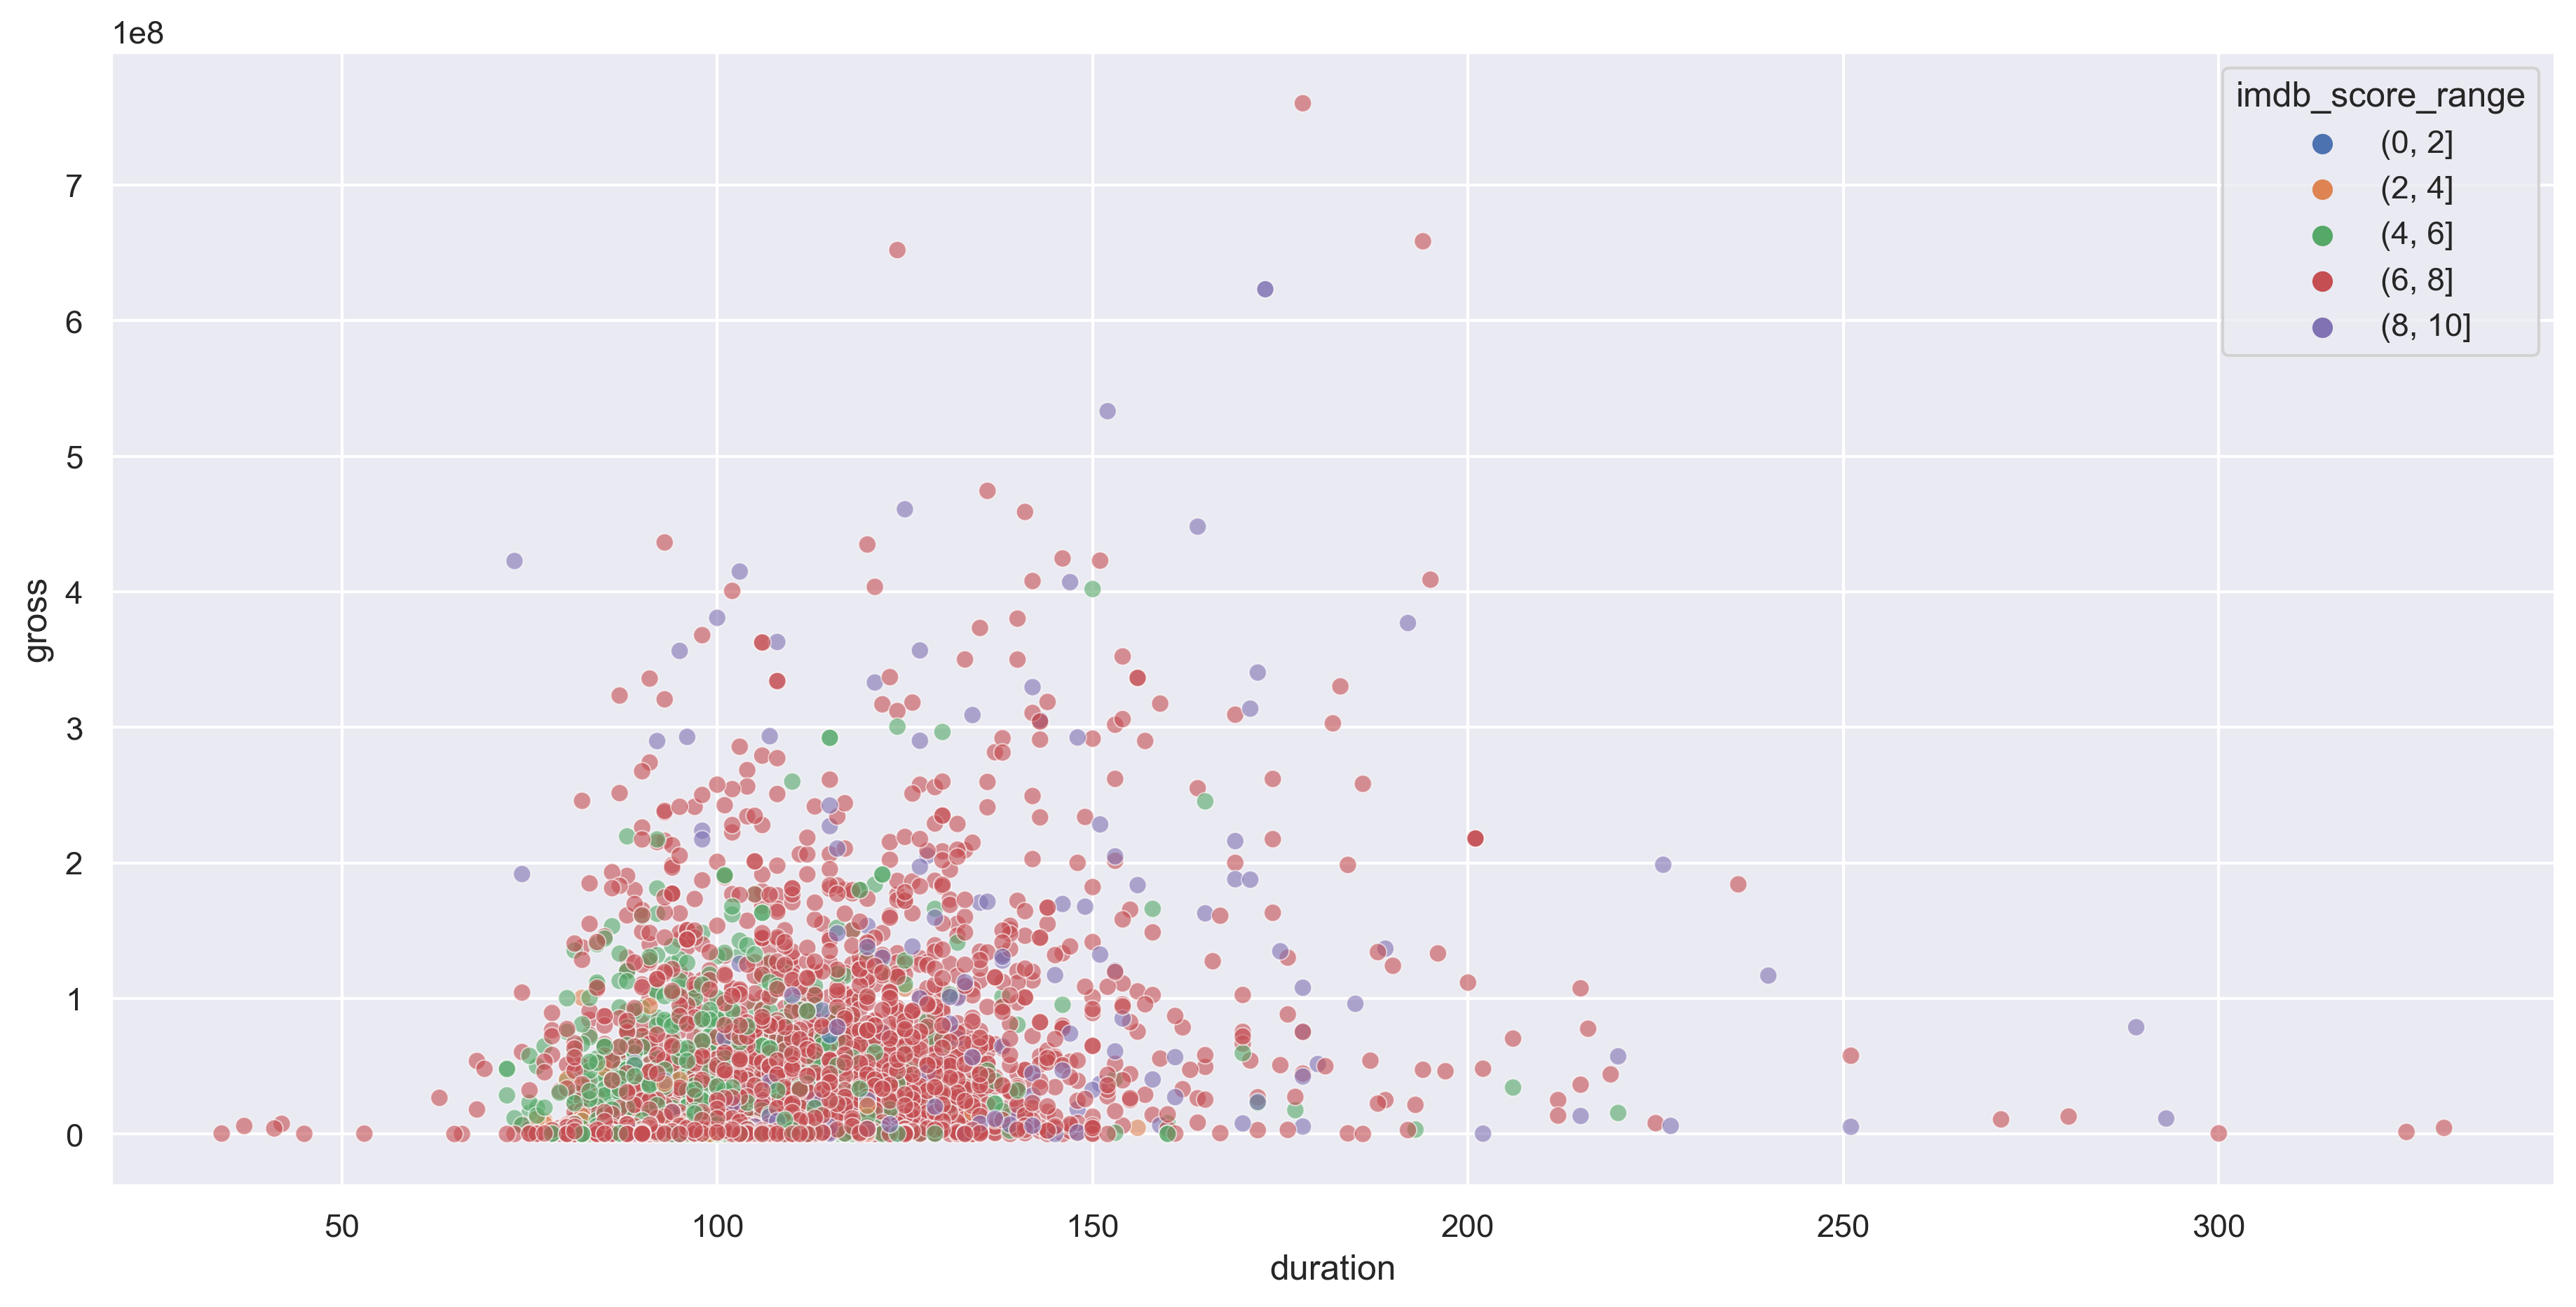

In [10]:
bin_edges = [0, 2, 4, 6, 8, 10]

# create a new column 'imdb_score_range' with the bin labels
df['imdb_score_range'] = pd.cut(df['imdb_score'], bins=bin_edges)

# create the scatter plot using the new 'imdb_score_range' column
plt.figure(figsize=(15, 7))
sns.scatterplot(x='duration', y='gross', data=df, hue='imdb_score_range', alpha=0.6)
plt.show()

/var/folders/kg/w853qbnj03x0b8wb35_f_v540000gp/T/ipykernel_55494/2085589095.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['imdb_score'], kde=False, color='red',


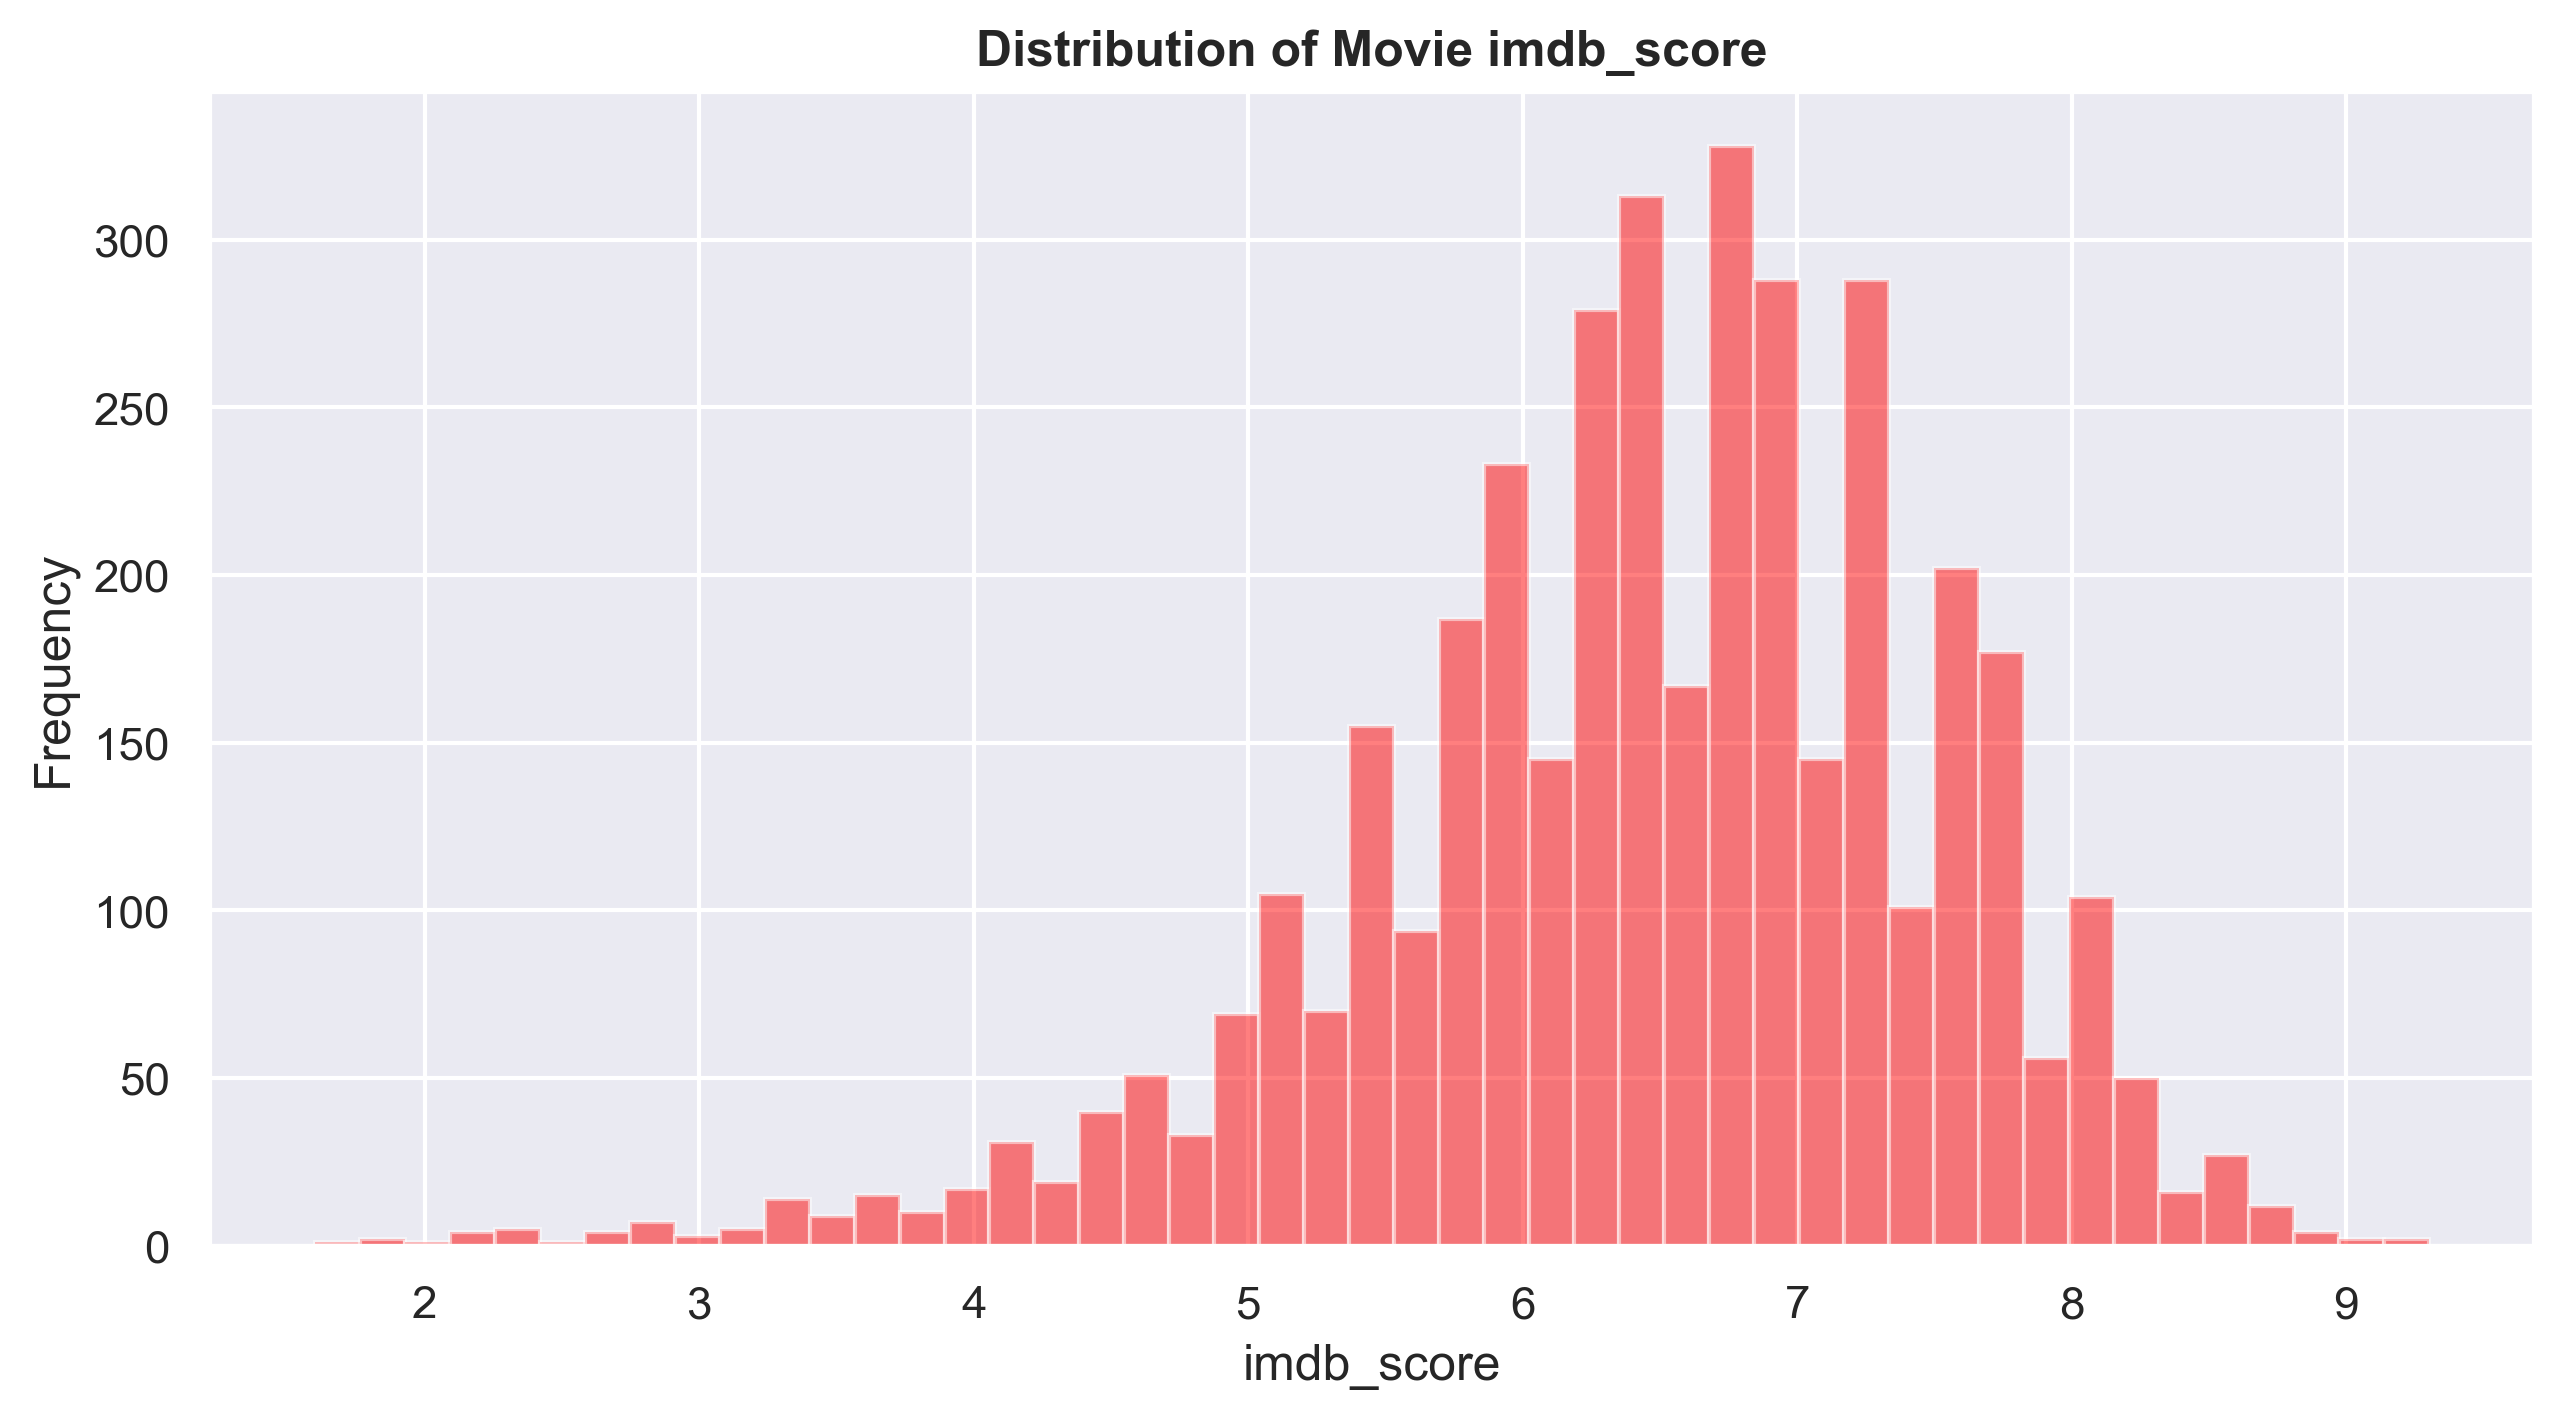

In [11]:
#Distribution of Movie imdb_score
plt.figure(figsize=(10,5), dpi=300)
ax = plt.gca()
sns.distplot(df['imdb_score'], kde=False, color='red', 
            hist_kws={'alpha': 0.5},
            axlabel='imdb_score', 
            ax=ax)
ax.set_xlabel('imdb_score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie imdb_score', fontweight='bold')
plt.show()

<Figure size 6000x2100 with 0 Axes>

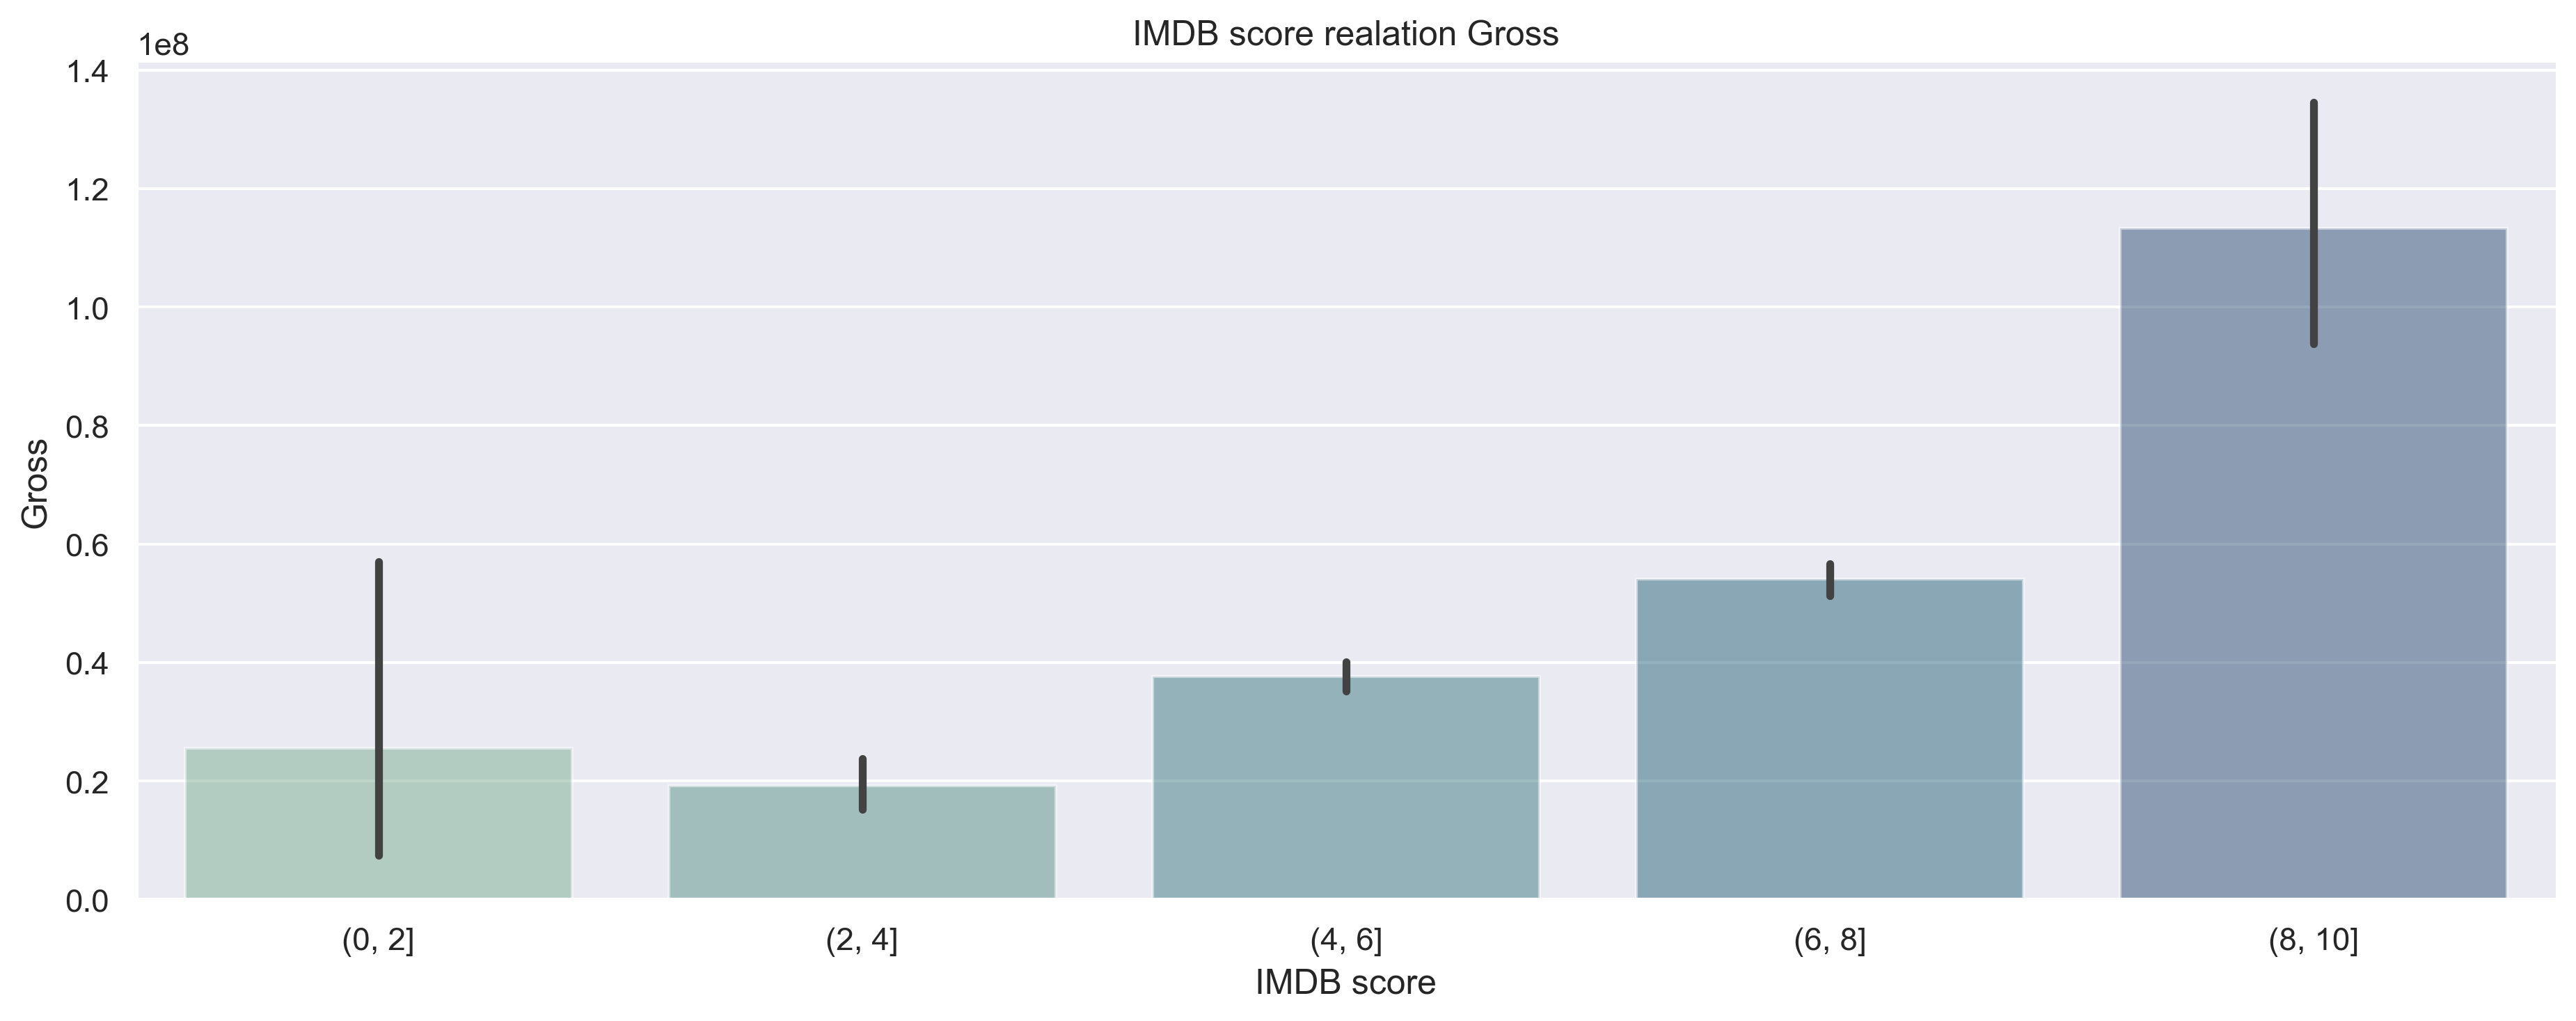

In [12]:
#IMDB score relation Gross
sns.set(rc={'figure.dpi':300})
plt.figure(figsize=(20, 7))
sns.catplot(y='gross', 
            x='imdb_score_range', 
            kind='bar', 
            palette="crest",
            data=df, 
            height=5, aspect=2.5, 
            alpha=0.5
            )
plt.title("IMDB score realation Gross")
plt.xlabel("IMDB score")
plt.ylabel("Gross")
plt.show()

In [13]:
df_select = df.drop(['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','cast_total_facebook_likes','facenumber_in_poster','movie_imdb_link','num_user_for_reviews','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes'], axis=1)

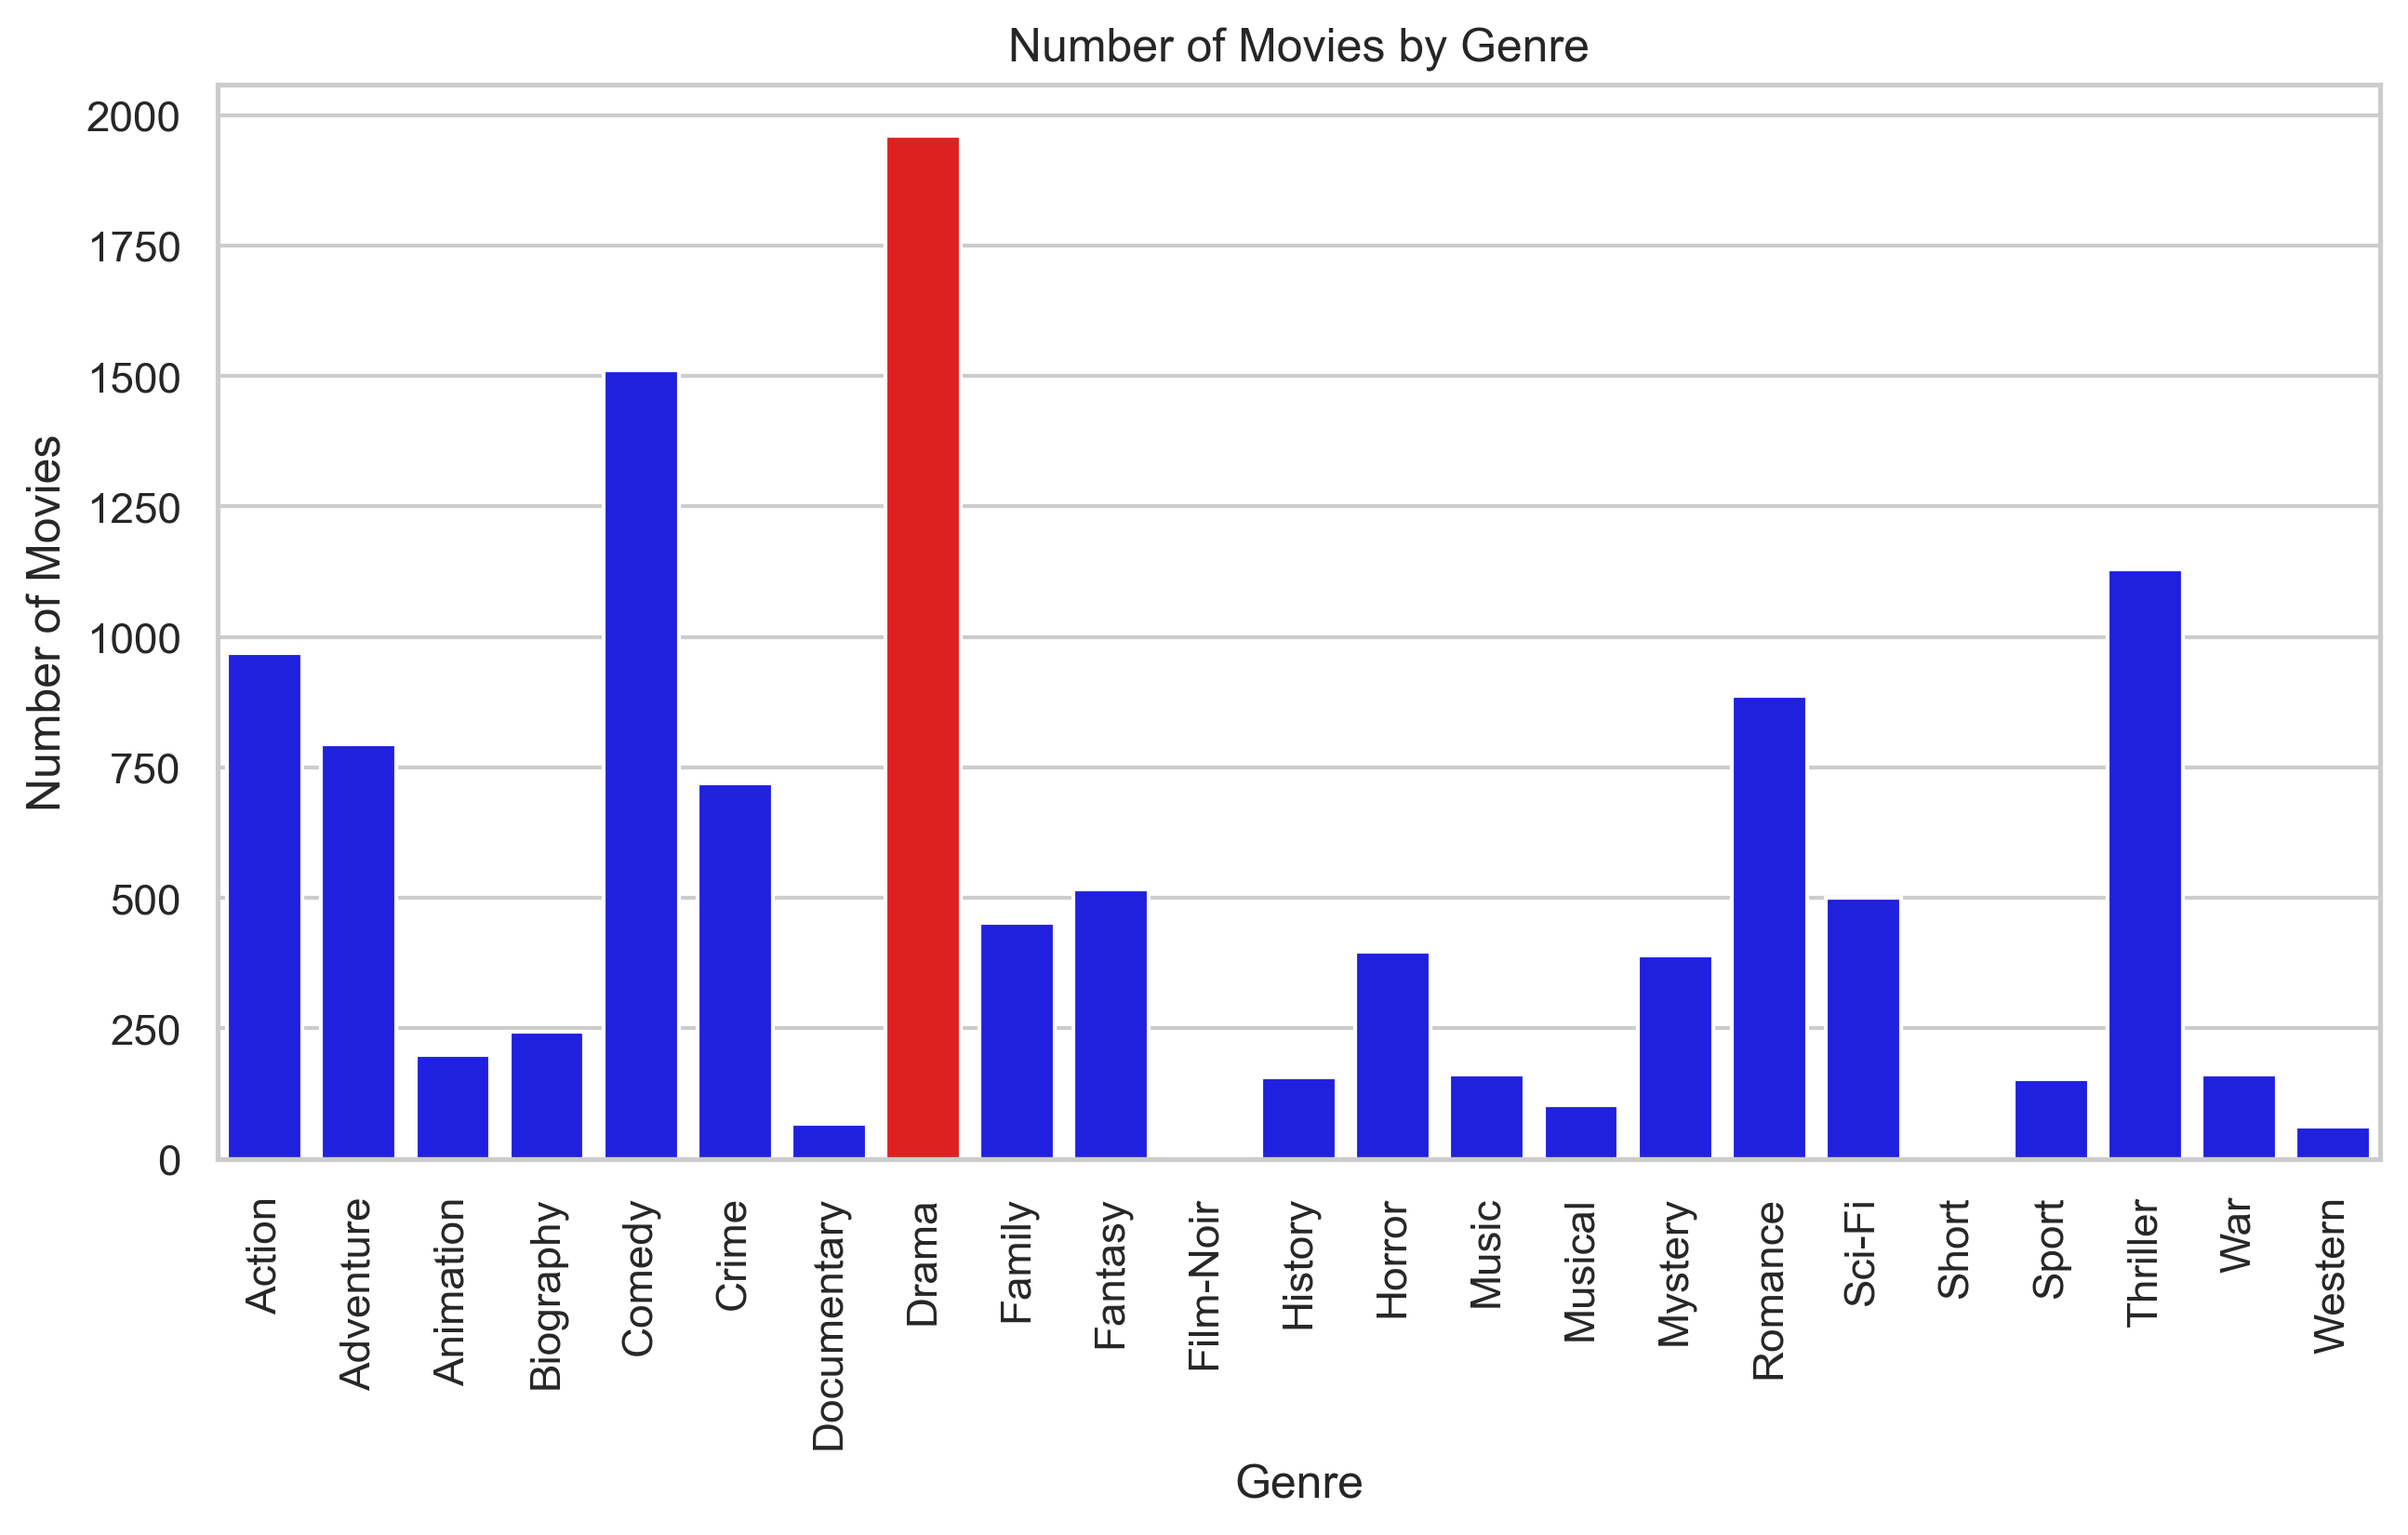

In [14]:
#make a list into column
df['split_genres'] = df['genres'].apply(lambda x: x.split('|'))
df_explode = df.explode('split_genres')
genre_counts = df_explode.groupby('split_genres')['movie_title'].count()
max_genre = genre_counts.idxmax()
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, 
            y=genre_counts.values, 
            palette=['blue' if g != max_genre else 'red' for g in genre_counts.index])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.show()


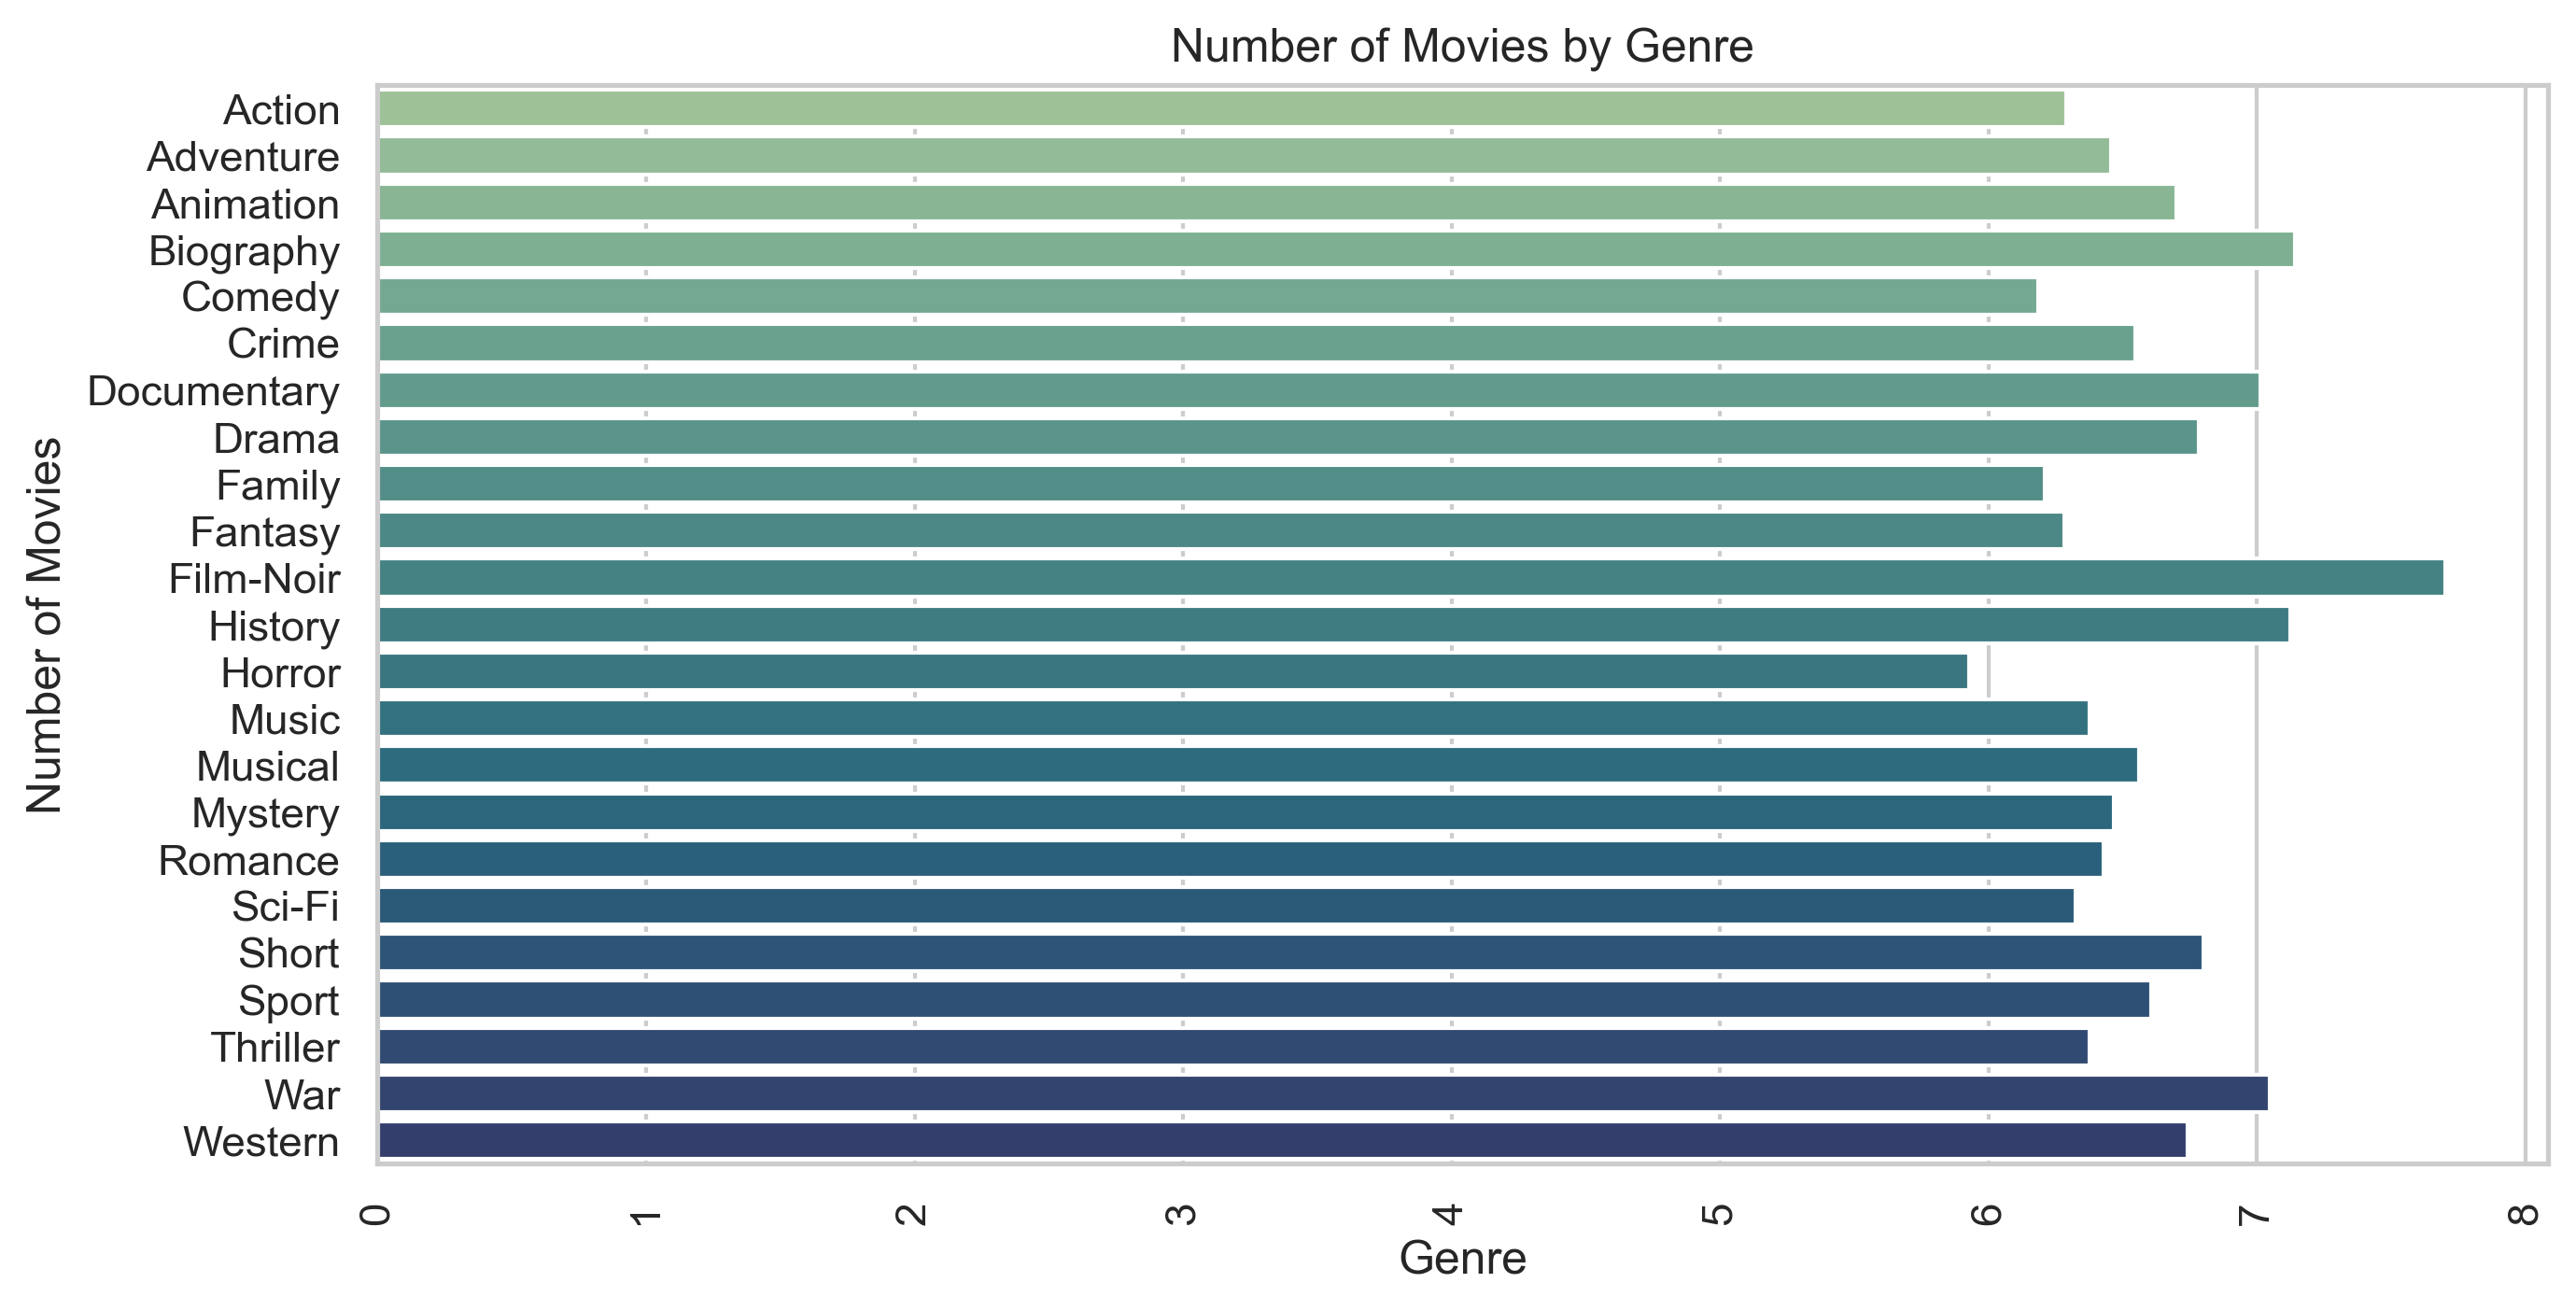

In [15]:
genre_mean = df_explode.groupby('split_genres')['imdb_score'].mean()
genre_mean
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(y=genre_mean.index, 
            x=genre_mean.values,
            palette="crest" )
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.show()

country
Brazil          7.760000
Iran            7.725000
Argentina       7.600000
Indonesia       7.600000
Sweden          7.600000
Netherlands     7.566667
Israel          7.500000
Colombia        7.500000
New Zealand     7.481818
South Africa    7.433333
Afghanistan     7.400000
Italy           7.345455
Denmark         7.233333
Finland         7.200000
Taiwan          7.150000
Norway          7.150000
China           7.073333
Mexico          6.990909
Ireland         6.985714
Spain           6.972727
Name: imdb_score, dtype: float64


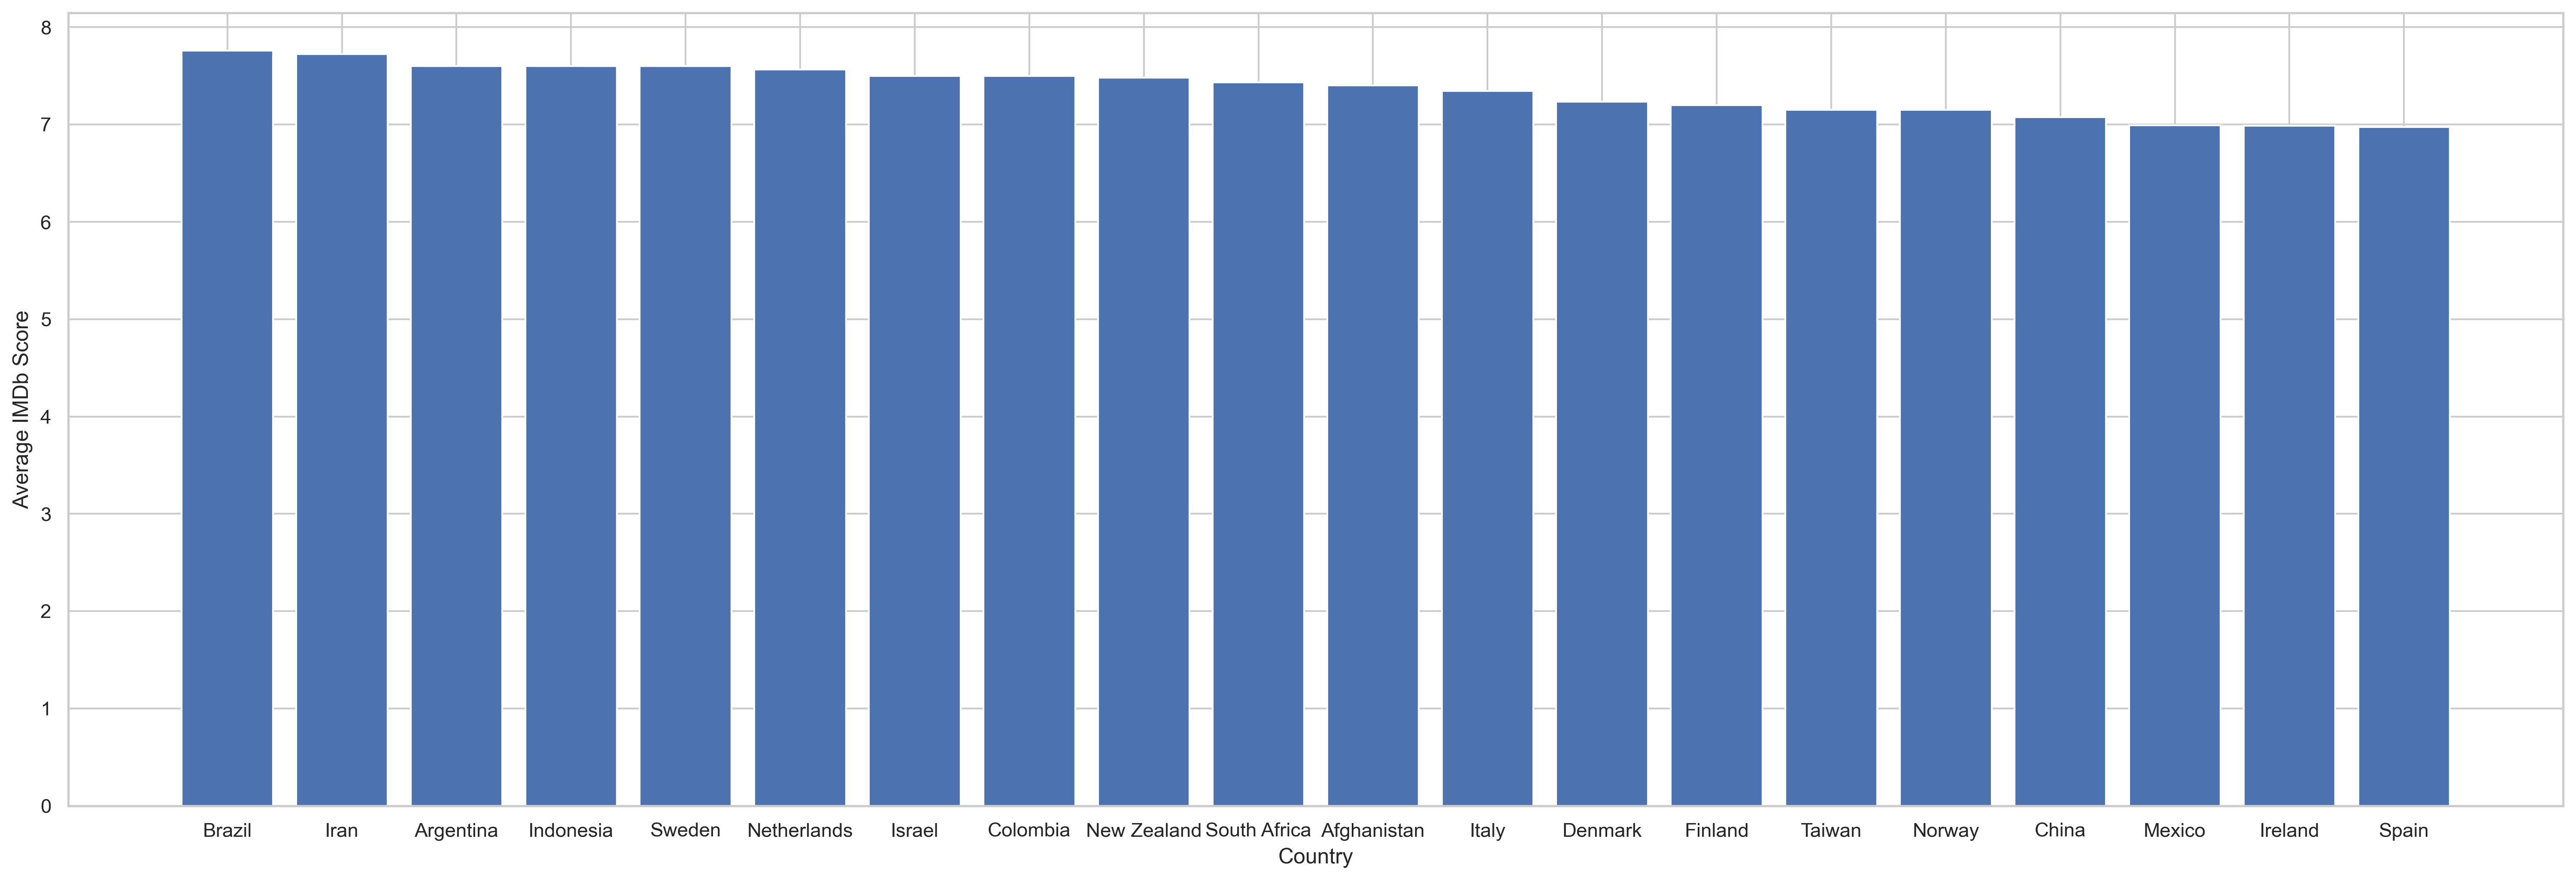

In [16]:
# Calculate the average IMDb scores for each country and store the result in p_country
p_country = df.groupby('country')['imdb_score'].mean()
p_country = p_country.sort_values(ascending=False).head(20)
plt.figure(figsize=(25,8),dpi=300)

# Plot
plt.bar( x=p_country.index, height=p_country )

plt.xlabel('Country')                  # Add label to x-axis
plt.ylabel('Average IMDb Score') # Add label to y-axis
print(p_country)

In [17]:
#5. เทรนด์หนัง ในแต่ละปี


In [18]:
p_country = df.groupby('country')['imdb_score'].mean()
print(p_country)

country
Afghanistan       7.400000
Argentina         7.600000
Aruba             4.800000
Australia         6.458537
Belgium           6.700000
Brazil            7.760000
Canada            6.196875
Chile             6.900000
China             7.073333
Colombia          7.500000
Czech Republic    6.966667
Denmark           7.233333
Finland           7.200000
France            6.776415
Georgia           5.600000
Germany           6.353012
Greece            6.700000
Hong Kong         6.884615
Hungary           6.450000
Iceland           6.900000
India             6.614286
Indonesia         7.600000
Iran              7.725000
Ireland           6.985714
Israel            7.500000
Italy             7.345455
Japan             6.958824
Mexico            6.990909
Netherlands       7.566667
New Zealand       7.481818
Norway            7.150000
Peru              5.400000
Philippines       6.300000
Poland            5.100000
Romania           6.400000
Russia            6.466667
South Africa      7.

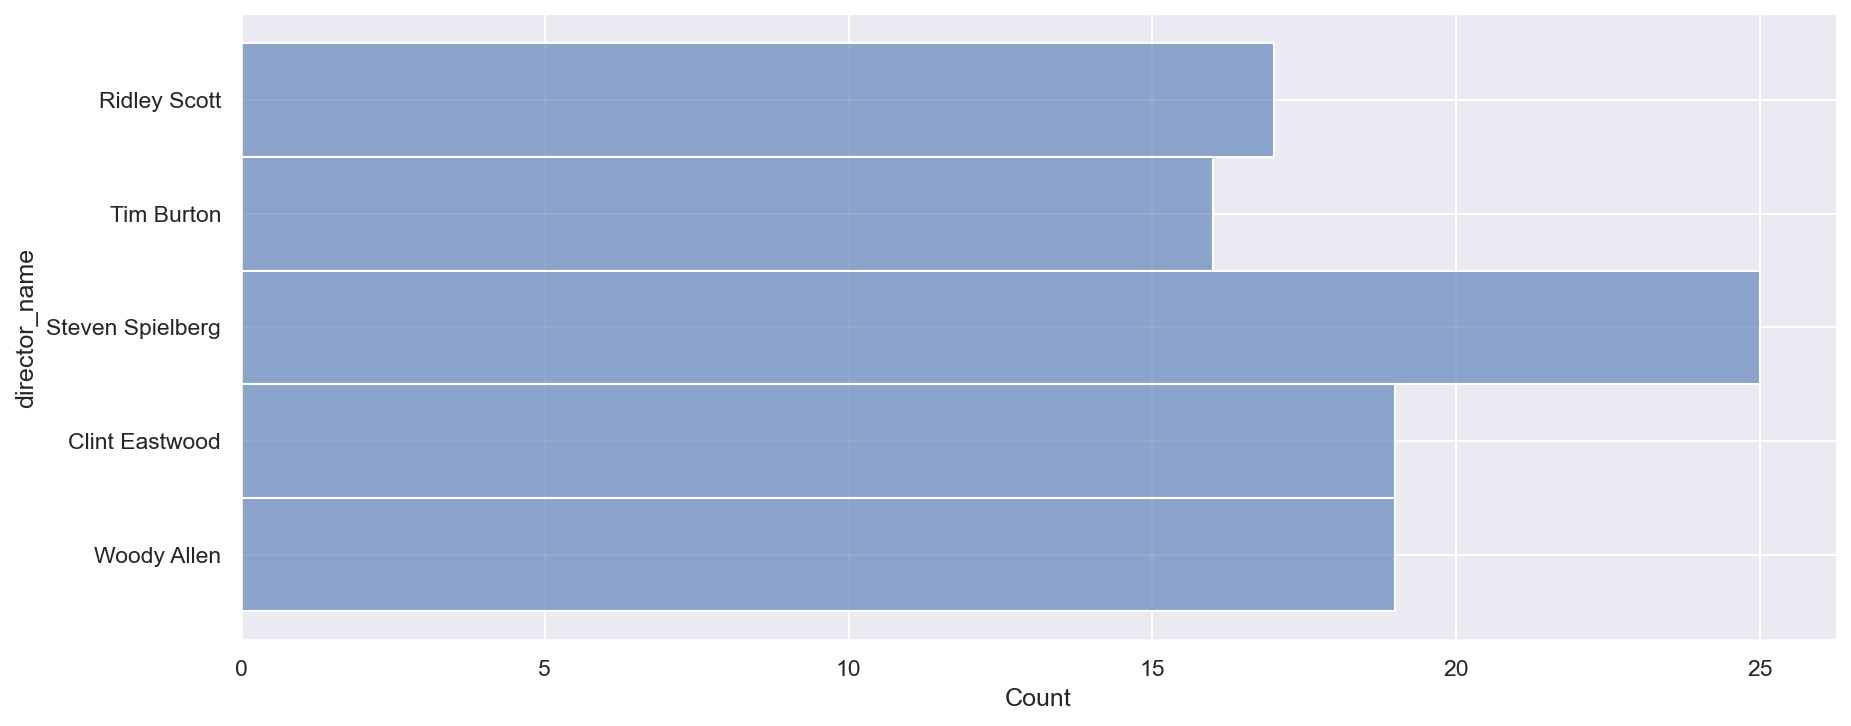

In [19]:
#direct_name top 5 
top_directors = df['director_name'].value_counts().head(5).index
df_top_directors = df[df['director_name'].isin(top_directors)]
sns.set(rc={'figure.dpi':150})
sns.displot( kind='hist',       # default:'hist'
             data=df_top_directors, 
             y='director_name',
             bins=20,           # default:10
             height=5, aspect=2.5,
             alpha=0.6,
          )

<Figure size 2250x1050 with 0 Axes>

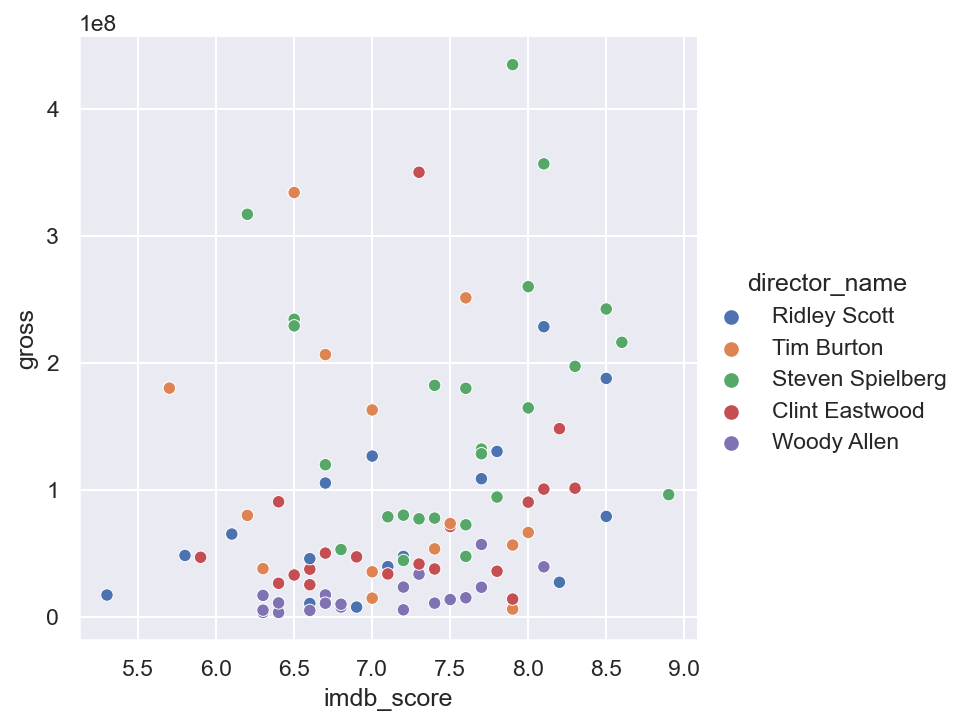

In [26]:
#Top 5 directors Gross&IMDB score
plt.figure(figsize=(15,7))
sns.relplot(kind='scatter',
            data=df_top_directors,
            x='imdb_score',
            y='gross',
            hue= 'director_name',
            height=5, aspect=1,    # Figure size must be set in the figure-level function
            alpha=1,
            ) 
# Display plot
plt.show()

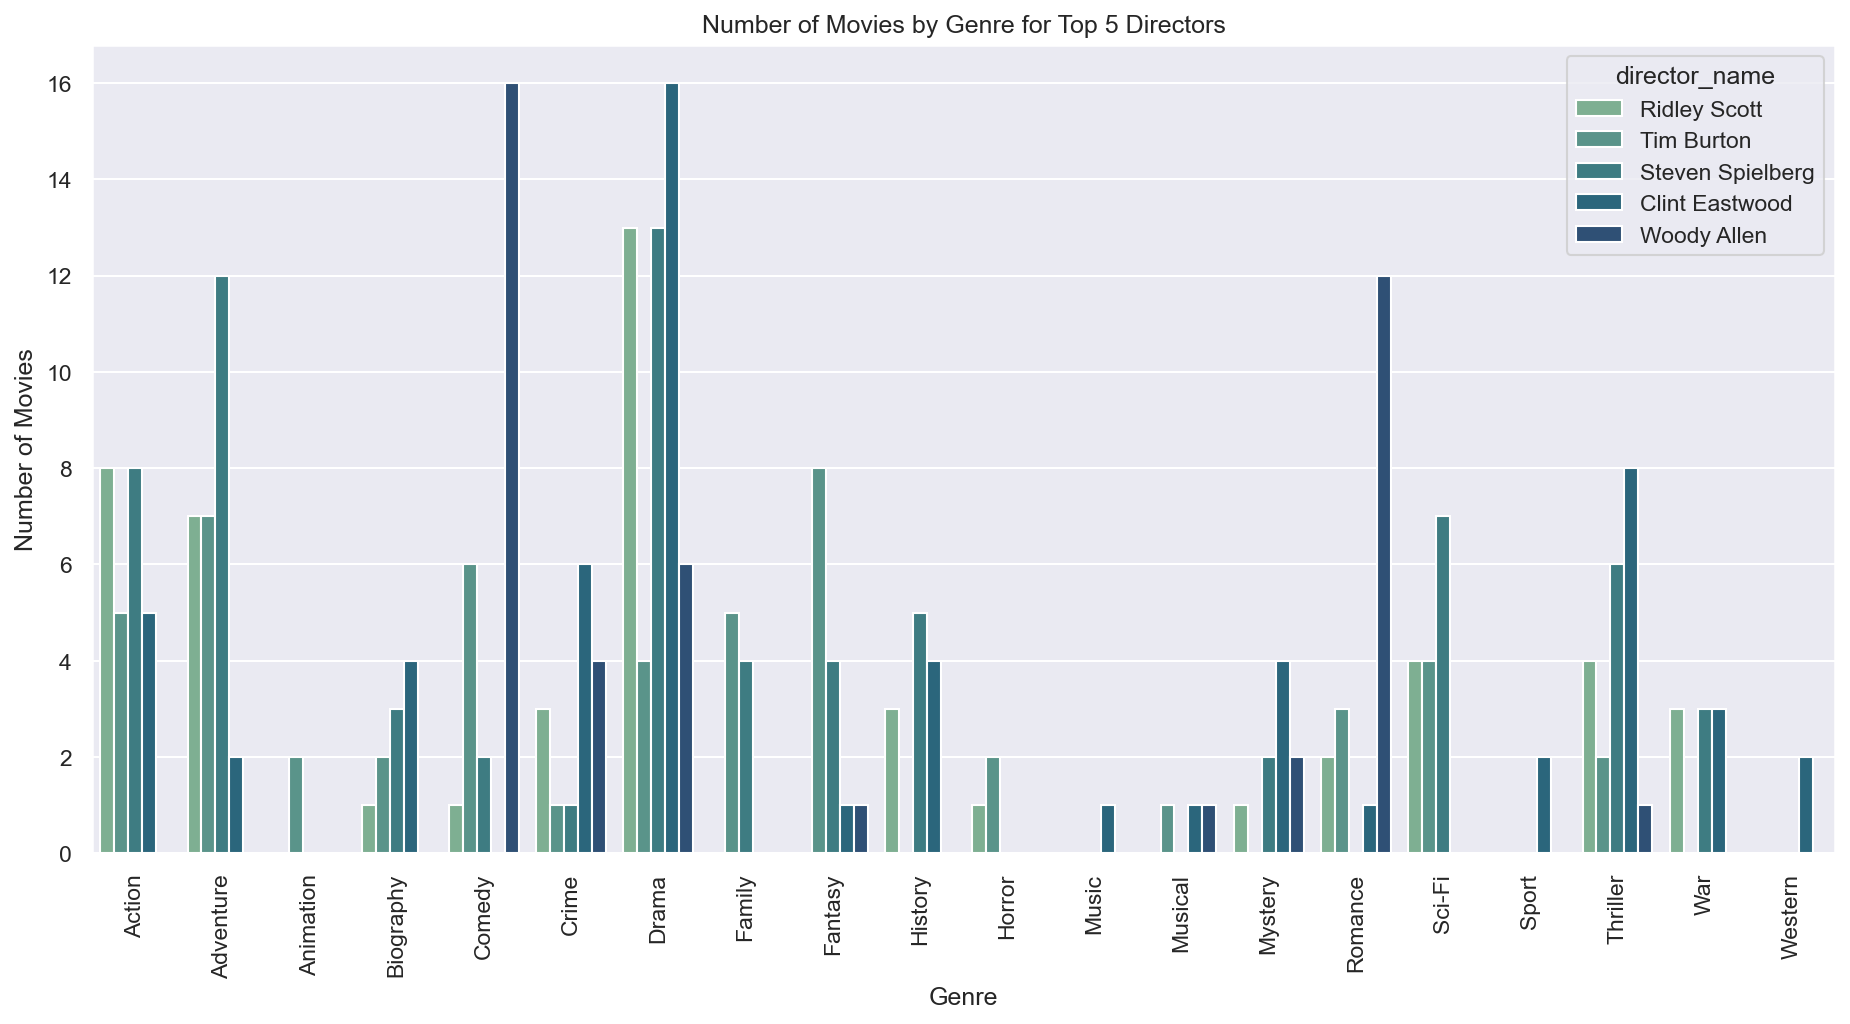

In [21]:
#Top 5 Directors
df_explode_top5 = df_top_directors.explode('split_genres')
genre_counts_top5 = df_explode_top5.groupby('split_genres')['movie_title'].count()
max_genre_top5 = genre_counts_top5.idxmax()
genre_mean_top5 = df_explode_top5.groupby('split_genres')['imdb_score'].mean()

plt.figure(figsize=(15,7))
sns.countplot(x='split_genres', 
              order=genre_mean_top5.index, 
              palette='crest', 
              data=df_explode_top5, 
              hue='director_name'
              )
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre for Top 5 Directors')
plt.show()

In [22]:
genre_mean_top5


split_genres
Action       6.919231
Adventure    6.946429
Animation    7.200000
Biography    7.520000
Comedy       6.932000
Crime        6.966667
Drama        7.290385
Family       6.988889
Fantasy      7.064286
History      7.500000
Horror       7.233333
Music        6.900000
Musical      7.033333
Mystery      7.155556
Romance      7.150000
Sci-Fi       7.200000
Sport        7.750000
Thriller     6.995238
War          7.355556
Western      7.800000
Name: imdb_score, dtype: float64